In [3]:
import numpy as np
import matplotlib.pyplot as plt
import mne
import os
import glob
import pandas as pd
import scipy

In [9]:
subject_1_fvep_led_training_1='ssvep/subject_1_fvep_led_training_1.EDF'
subject_1_fvep_led_training_2='ssvep/subject_1_fvep_led_training_2.EDF'
subject_2_fvep_led_training_1='ssvep/subject_2_fvep_led_training_1.EDF'
subject_2_fvep_led_training_2='ssvep/subject_2_fvep_led_training_2.EDF'

In [10]:
subject_1_fvep_led_training_1_data=mne.io.read_raw_edf(subject_1_fvep_led_training_1, preload=True)
subject_1_fvep_led_training_2_data=mne.io.read_raw_edf(subject_1_fvep_led_training_2, preload=True)
subject_2_fvep_led_training_1_data=mne.io.read_raw_edf(subject_2_fvep_led_training_1, preload=True)
subject_2_fvep_led_training_2_data=mne.io.read_raw_edf(subject_2_fvep_led_training_2, preload=True)

Extracting EDF parameters from c:\Users\GADGET BD 71\Desktop\SSVEP_research\hackathon_ssvep_analysis\ssvep\subject_1_fvep_led_training_1.EDF...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 57855  =      0.000 ...   225.996 secs...
Extracting EDF parameters from c:\Users\GADGET BD 71\Desktop\SSVEP_research\hackathon_ssvep_analysis\ssvep\subject_1_fvep_led_training_2.EDF...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 58111  =      0.000 ...   226.996 secs...
Extracting EDF parameters from c:\Users\GADGET BD 71\Desktop\SSVEP_research\hackathon_ssvep_analysis\ssvep\subject_2_fvep_led_training_1.EDF...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 58879  =      0.000 ...   229.996 secs...
Extracting EDF parameters from c:\Users\GADGET BD 71\Desktop\SSVEP_research\hackathon_ssvep_analysis\ssvep\subject_2_fvep_led_training_2.EDF...
EDF fil

In [11]:
import numpy as np

class_labels = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1],
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1],
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1],
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1],
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])

print(class_labels)

[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


In [12]:
import numpy as np

# Convert one-hot encoded labels to frequencies
ground_truth_frequencies = np.array([9, 10, 12, 15])  # Define this to match the order of the one-hot encoding

# Get frequency indices from class_labels
frequency_indices = np.dot(class_labels, np.array([1, 2, 3, 4]))
frequency_indices = frequency_indices.astype(int)  # Convert to integer
ground_truth_frequencies = ground_truth_frequencies[frequency_indices - 1]  # Python uses 0-based indexing

# Create a new variable for comparing with LDA
lda_ground_truth = np.zeros(len(ground_truth_frequencies))

# Split into low-frequency (9/10 Hz) and high-frequency (12/15 Hz) groups
for i in range(len(ground_truth_frequencies)):
   if ground_truth_frequencies[i] in [9, 10]:
       lda_ground_truth[i] = 0  # Low-frequency group (9/10 Hz)
   elif ground_truth_frequencies[i] in [12, 15]:
       lda_ground_truth[i] = 3  # High-frequency group (12/15 Hz)

print("Ground truth frequencies:", ground_truth_frequencies)
print("LDA ground truth:", lda_ground_truth)

Ground truth frequencies: [ 9 10 12 15  9 10 12 15  9 10 12 15  9 10 12 15  9 10 12 15]
LDA ground truth: [0. 0. 3. 3. 0. 0. 3. 3. 0. 0. 3. 3. 0. 0. 3. 3. 0. 0. 3. 3.]


In [16]:
eeg_data_array, time_samples_array = subject_1_fvep_led_training_1_data['eeg']

# Extract parts (starting from 1001st sample)
sample_time = time_samples_array[1000:]  # Time samples from the 1001st sample onward

# For EEG data, determine the row indices based on your channel layout
# Assuming channels 2-9 correspond to rows 1-8 (since Python is 0-indexed)
EEG_data = eeg_data_array[1:9, 1000:]  # EEG data from CH2-9, starting from 1001st sample

# For trigger and LDA information, you may need to check if they're in different fields
# or in specific rows of the EEG data array
# This is an assumption - adjust according to your actual data structure
if eeg_data_array.shape[0] > 10:  # Check if there are enough rows
    trigger_info = eeg_data_array[9, 1000:]  # Trigger information from 1001st sample
    lda_output = eeg_data_array[10, 1000:]  # LDA classification output from 1001st sample
else:
    # You might need to look for trigger and LDA data in different fields
    print("Trigger and LDA data might be in different fields. Please inspect the data structure.")

# Print shapes to verify
print("Sample time shape:", sample_time.shape)
print("EEG data shape:", EEG_data.shape)
try:
    print("Trigger info shape:", trigger_info.shape)
    print("LDA output shape:", lda_output.shape)
except NameError:
    print("Trigger and LDA data not extracted - please locate them in your data structure")

Sample time shape: (56856,)
EEG data shape: (8, 56856)
Trigger info shape: (56856,)
LDA output shape: (56856,)


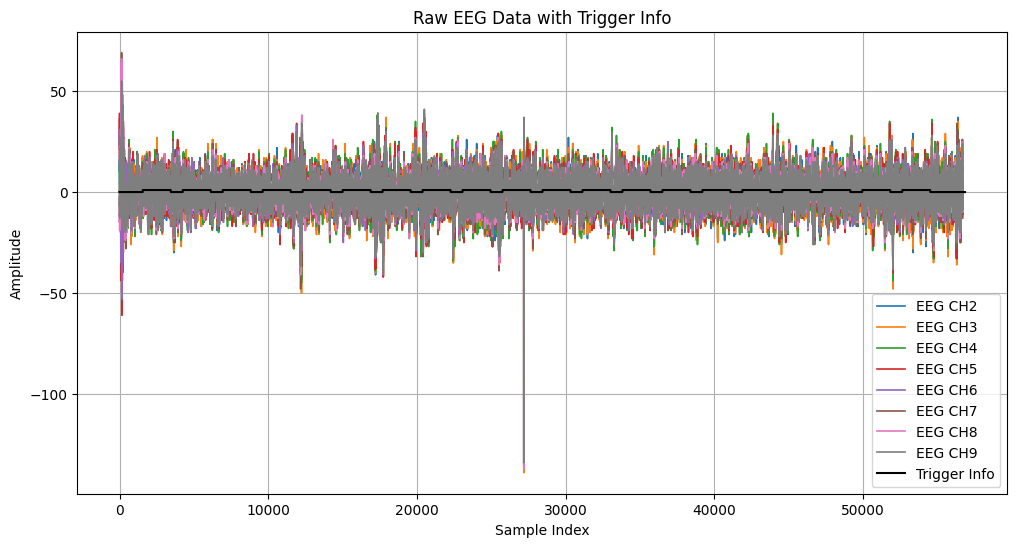

In [17]:
fs = 256  # Hz

# Plot raw EEG signals with trigger info
plt.figure(figsize=(12, 6))
plt.plot(EEG_data.T, linewidth=1.2)
plt.plot(trigger_info, 'k', linewidth=1.5)
plt.title('Raw EEG Data with Trigger Info')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend(['EEG CH2', 'EEG CH3', 'EEG CH4', 'EEG CH5', 'EEG CH6', 'EEG CH7', 'EEG CH8', 'EEG CH9', 'Trigger Info'])
plt.grid(True)
plt.show()

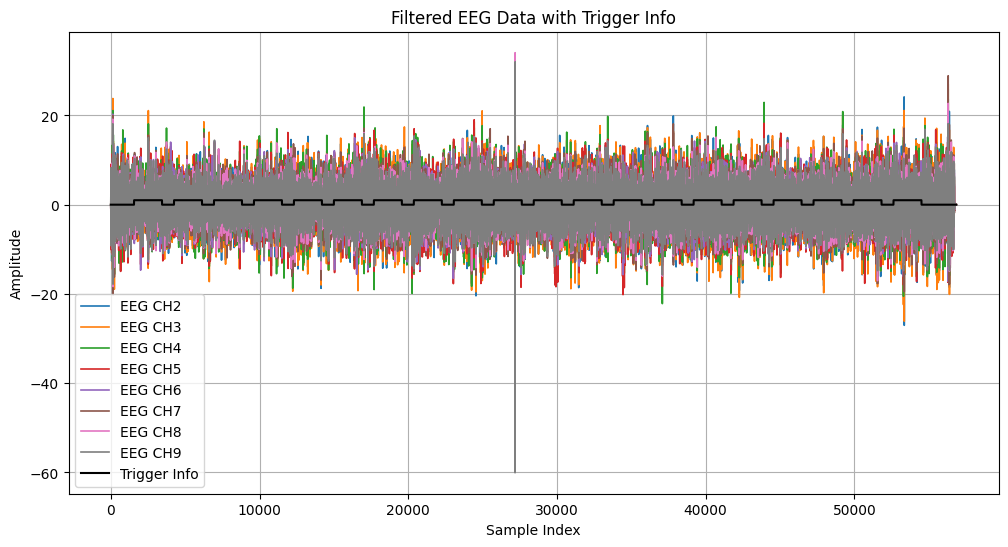

In [19]:
from scipy import signal

# Bandpass filter settings (5-30 Hz)
b_bandpass, a_bandpass = signal.butter(4, [5, 30], fs=fs, btype='bandpass')

# Notch filter settings at 50 Hz
b_notch, a_notch = signal.butter(2, [49, 51], fs=fs, btype='bandstop')

# Apply the filters to each EEG channel
EEG_data_filtered = np.zeros_like(EEG_data)
for ch in range(8):  # For channels 0-7 (corresponding to channels 2-9)
    # Apply bandpass filter
    EEG_data_bandpassed = signal.filtfilt(b_bandpass, a_bandpass, EEG_data[ch, :])
    
    # Apply notch filter at 50 Hz
    EEG_data_filtered[ch, :] = signal.filtfilt(b_notch, a_notch, EEG_data_bandpassed)

# Plot filtered EEG signals with trigger info
plt.figure(figsize=(12, 6))
plt.plot(EEG_data_filtered.T, linewidth=1.2)
plt.plot(trigger_info, 'k', linewidth=1.5)
plt.title('Filtered EEG Data with Trigger Info')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend(['EEG CH2', 'EEG CH3', 'EEG CH4', 'EEG CH5', 'EEG CH6', 'EEG CH7', 'EEG CH8', 'EEG CH9', 'Trigger Info'])
plt.grid(True)
plt.show()

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy.io as sio

# Find transitions in trigger_info from 0 to 1
onsets = np.where(np.diff(trigger_info) == 1)[0] + 1  # +1 to get the first sample of the onset

# Initialize epochs container
epochs = []
window_size = fs * 3  # Example window of 3 seconds

# Extract the epochs around the stimulation onsets
for i in range(len(onsets)):
   if (onsets[i] + window_size - 1) <= len(sample_time):
       epoch = EEG_data_filtered[:, onsets[i]:onsets[i] + window_size - 1]
       epochs.append(epoch)  # Store the epoch

# Ensure that lda_output matches the number of epochs
num_epochs = len(epochs)
assert num_epochs == len(lda_ground_truth), "Number of epochs does not match ground truth labels"

# Define frequencies of interest and harmonics
frequencies_of_interest = np.array([9, 10, 12, 15])
frequencies_of_interest_reversed = np.flip(frequencies_of_interest)
harmonics = 3  # Number of harmonics to consider

# Print some information
print(f"Number of detected onsets: {len(onsets)}")
print(f"Number of valid epochs: {num_epochs}")
print(f"Shape of first epoch: {epochs[0].shape if epochs else 'No epochs'}")

Number of detected onsets: 20
Number of valid epochs: 20
Shape of first epoch: (8, 767)


## Plot the FFT of each epoch

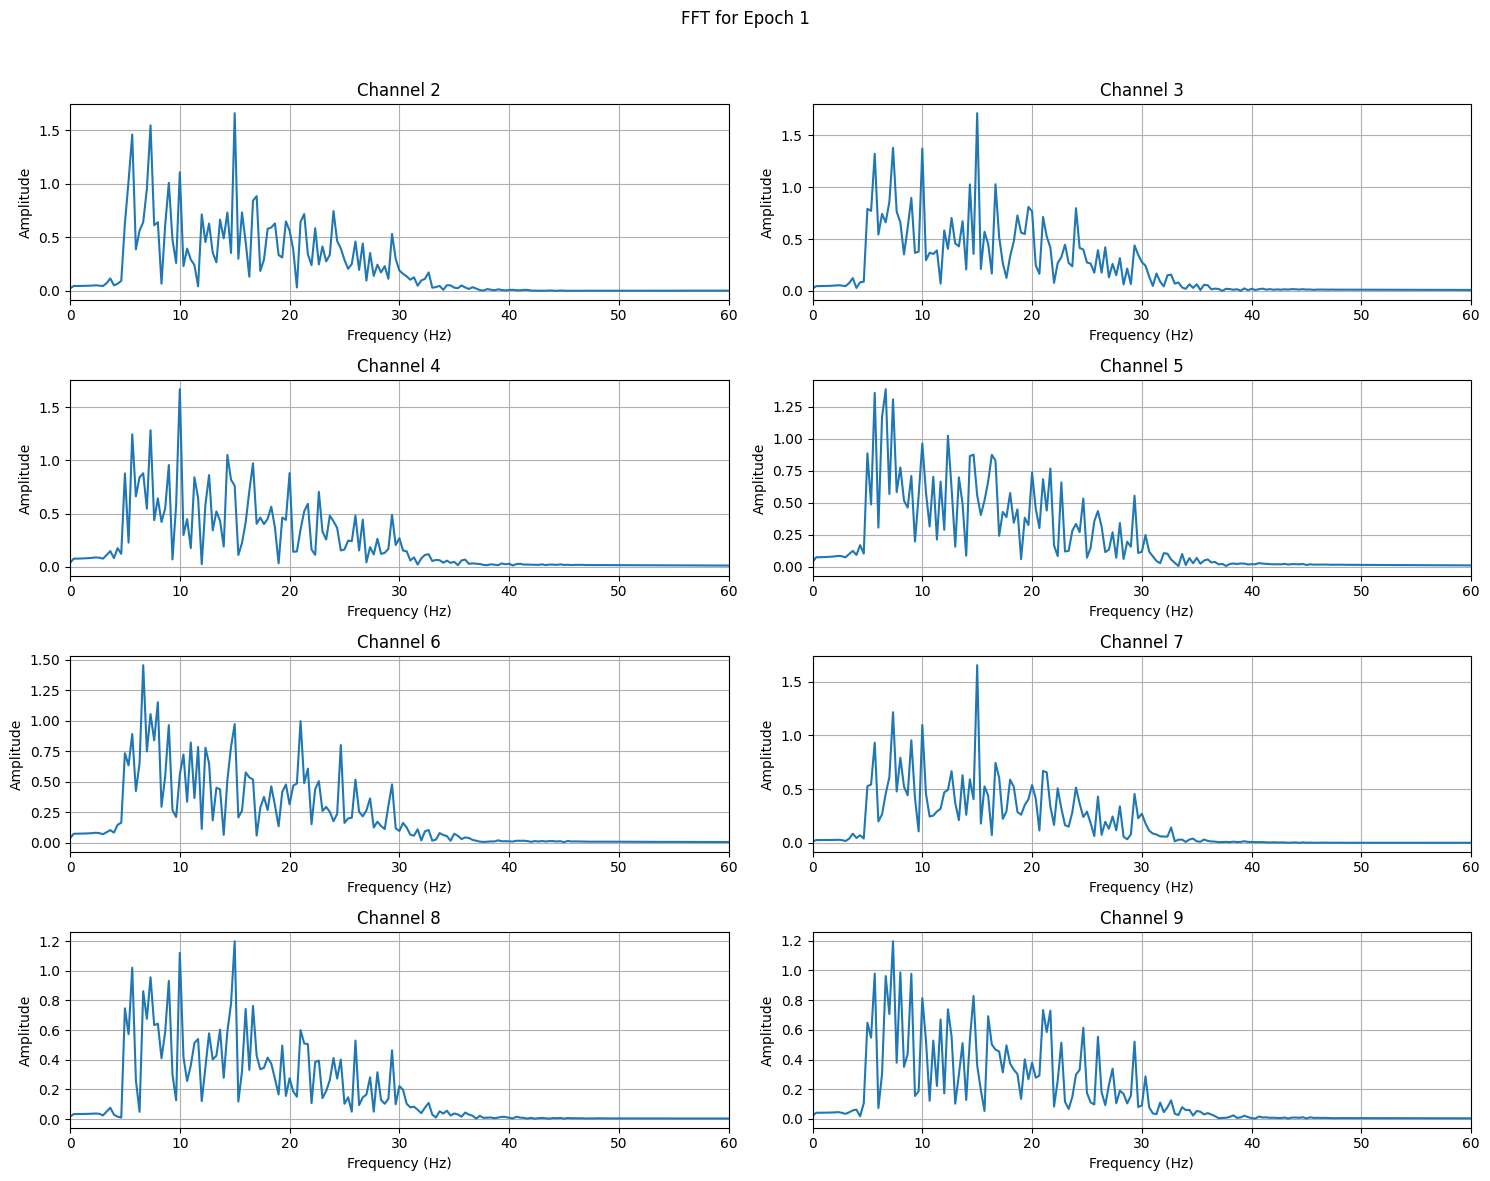

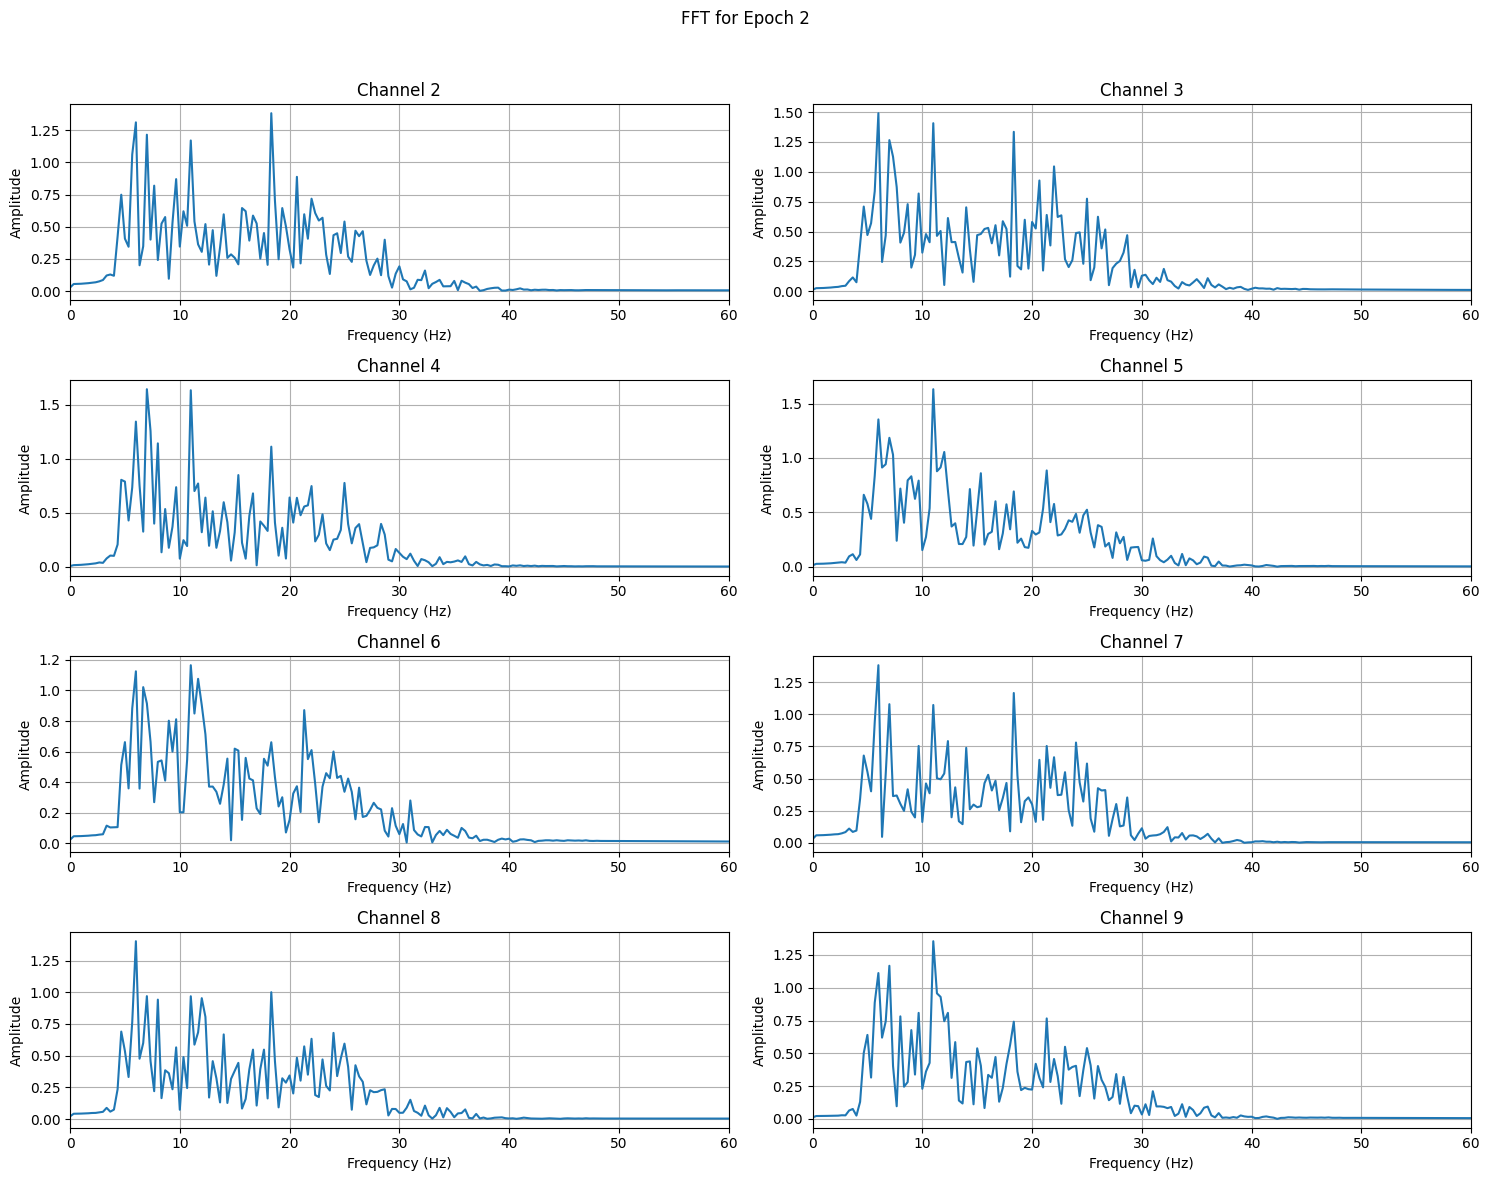

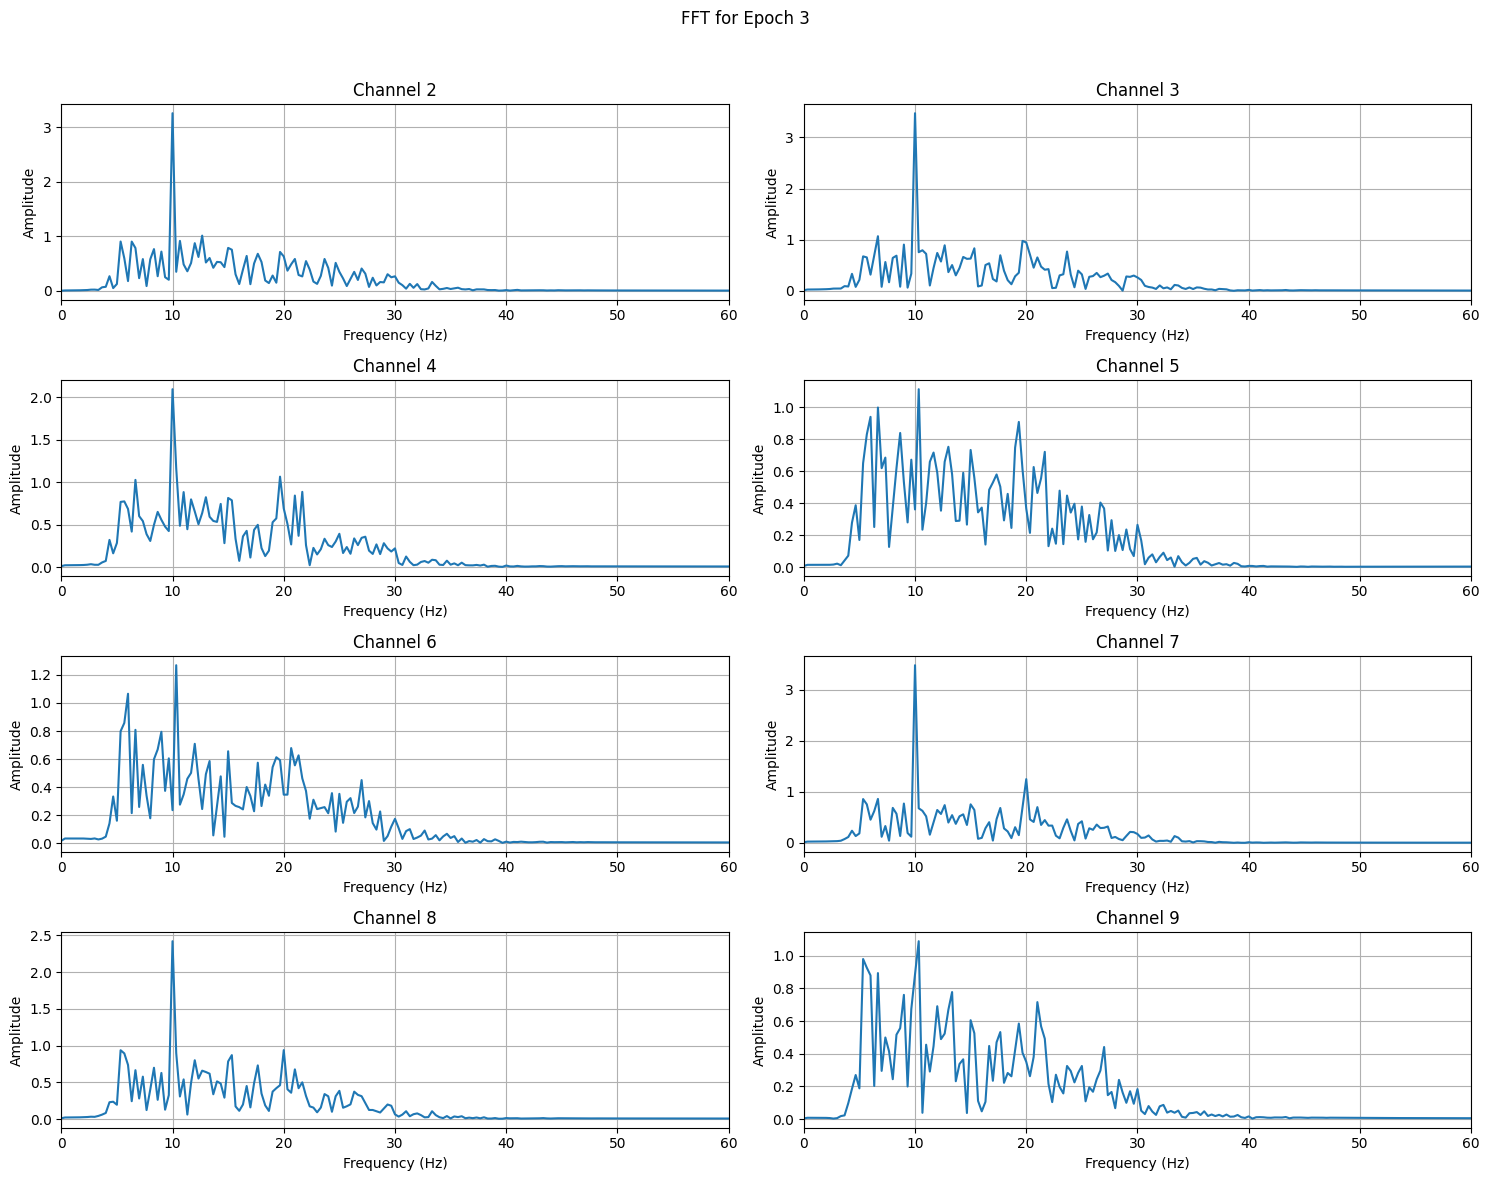

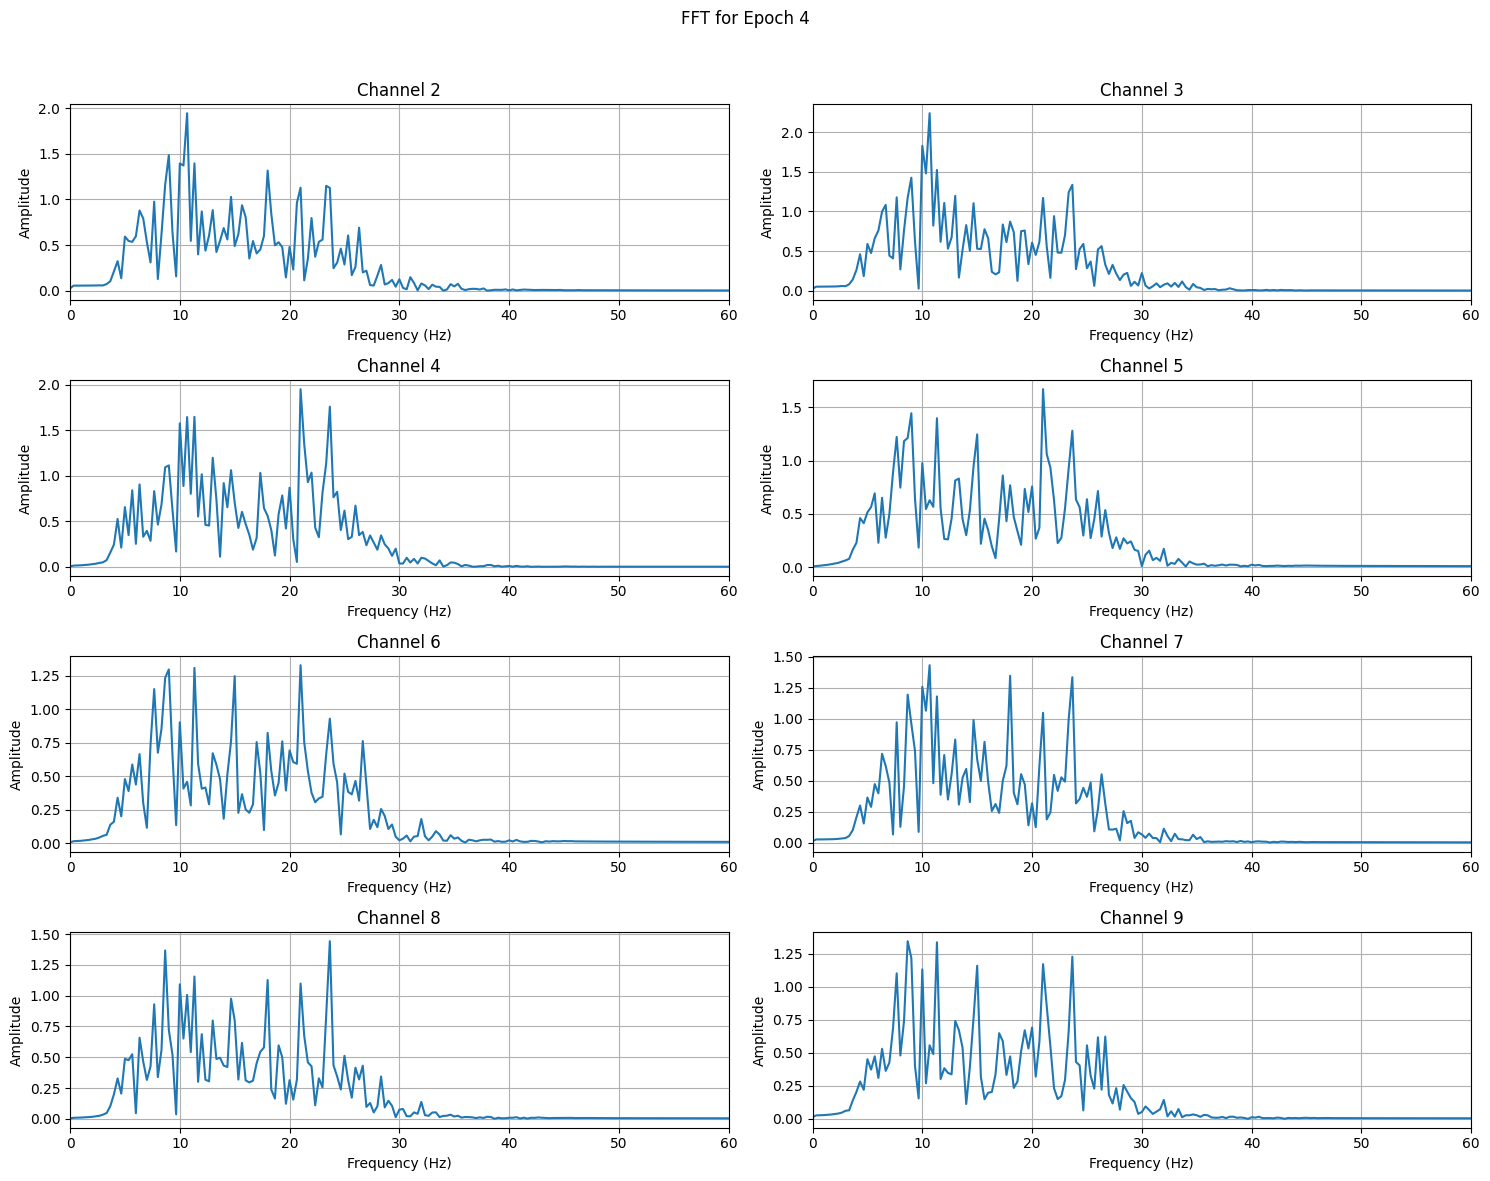

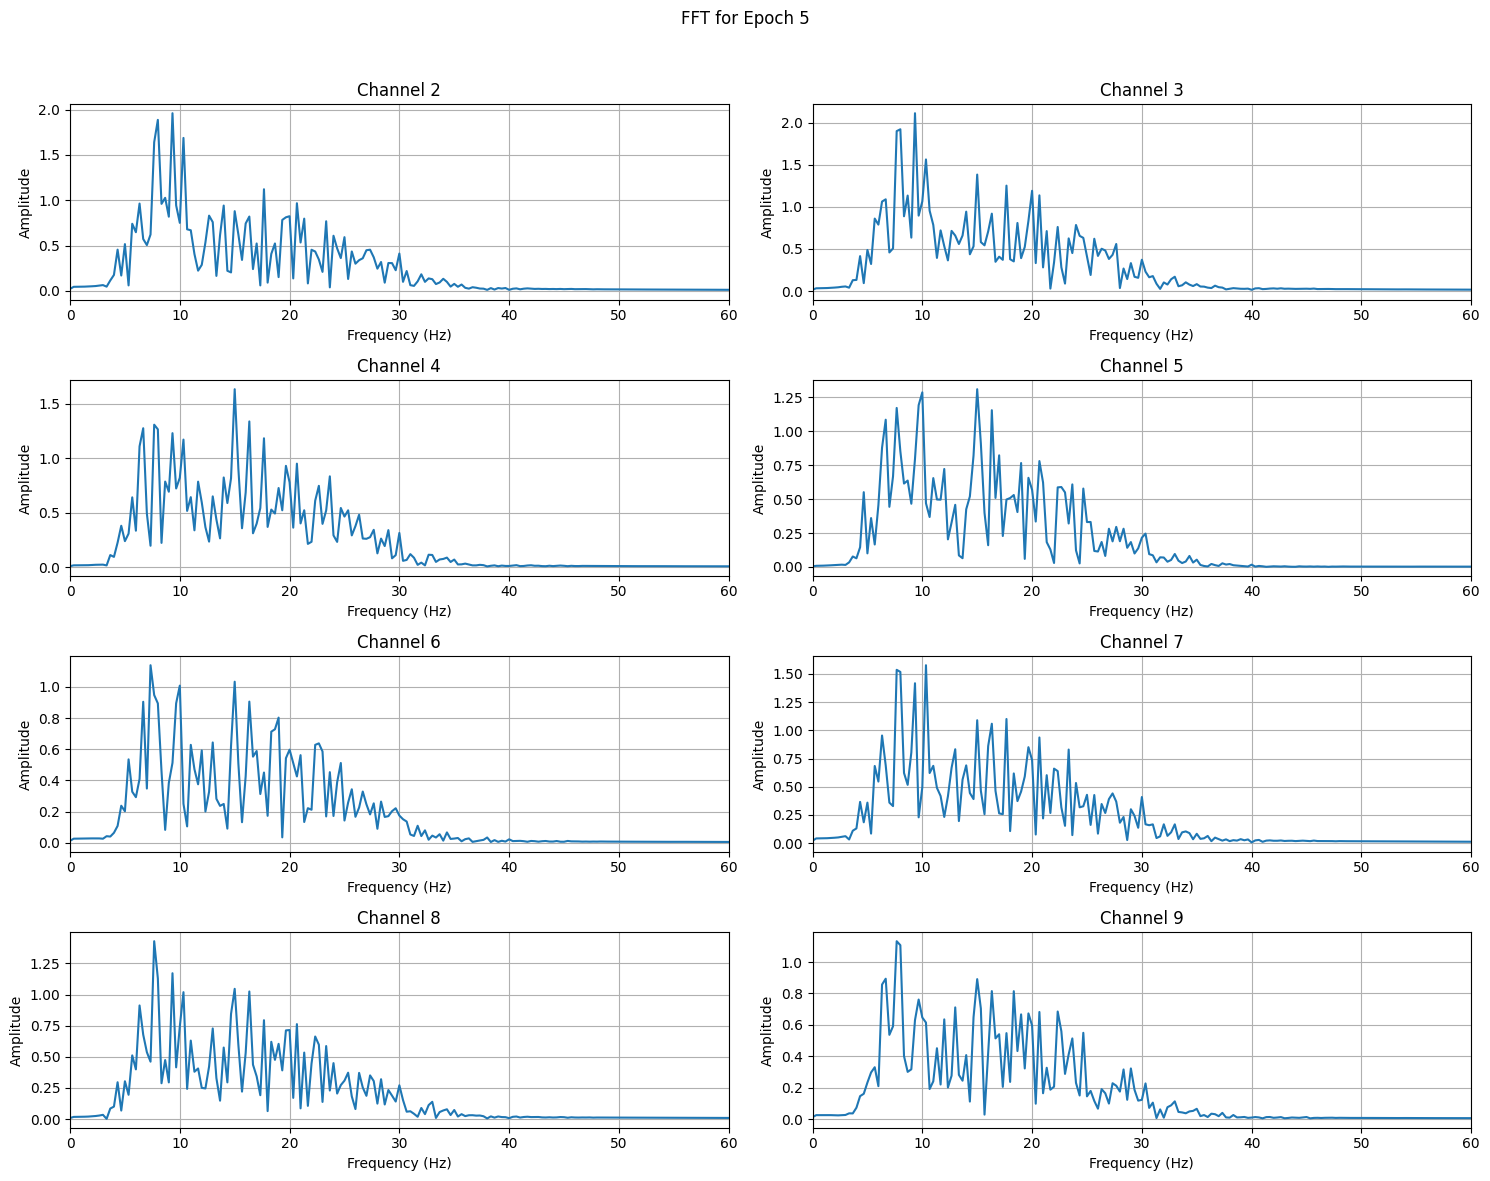

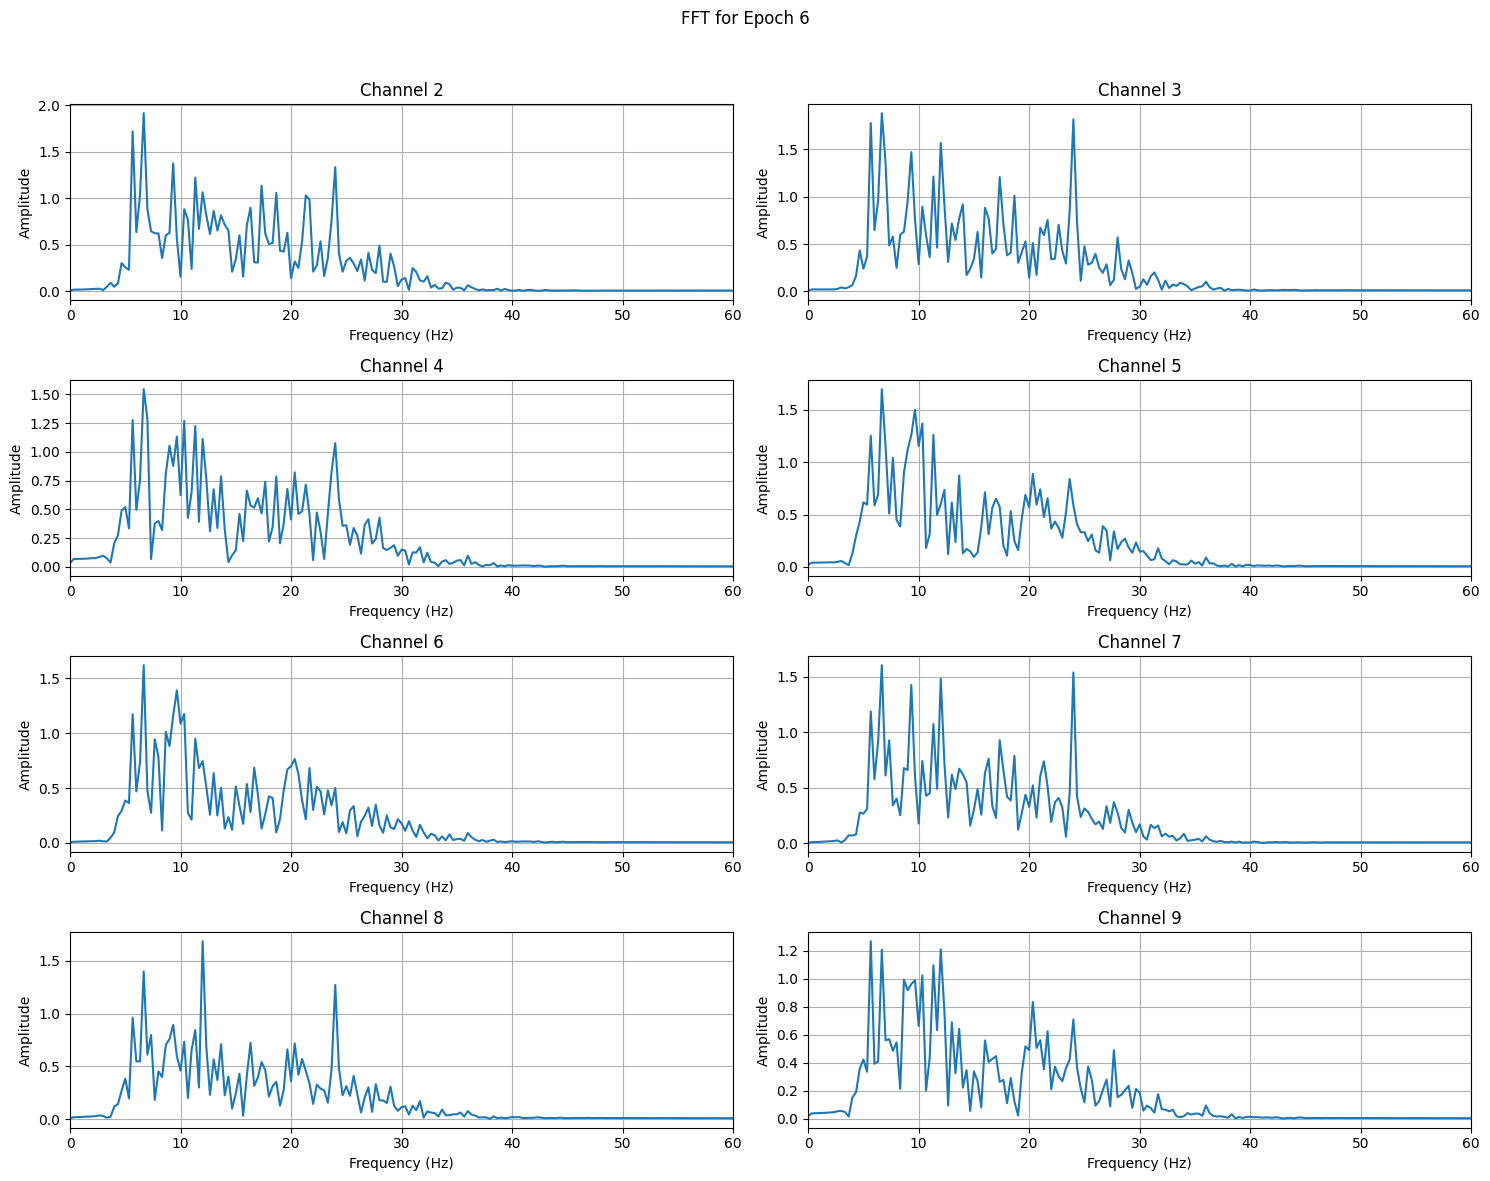

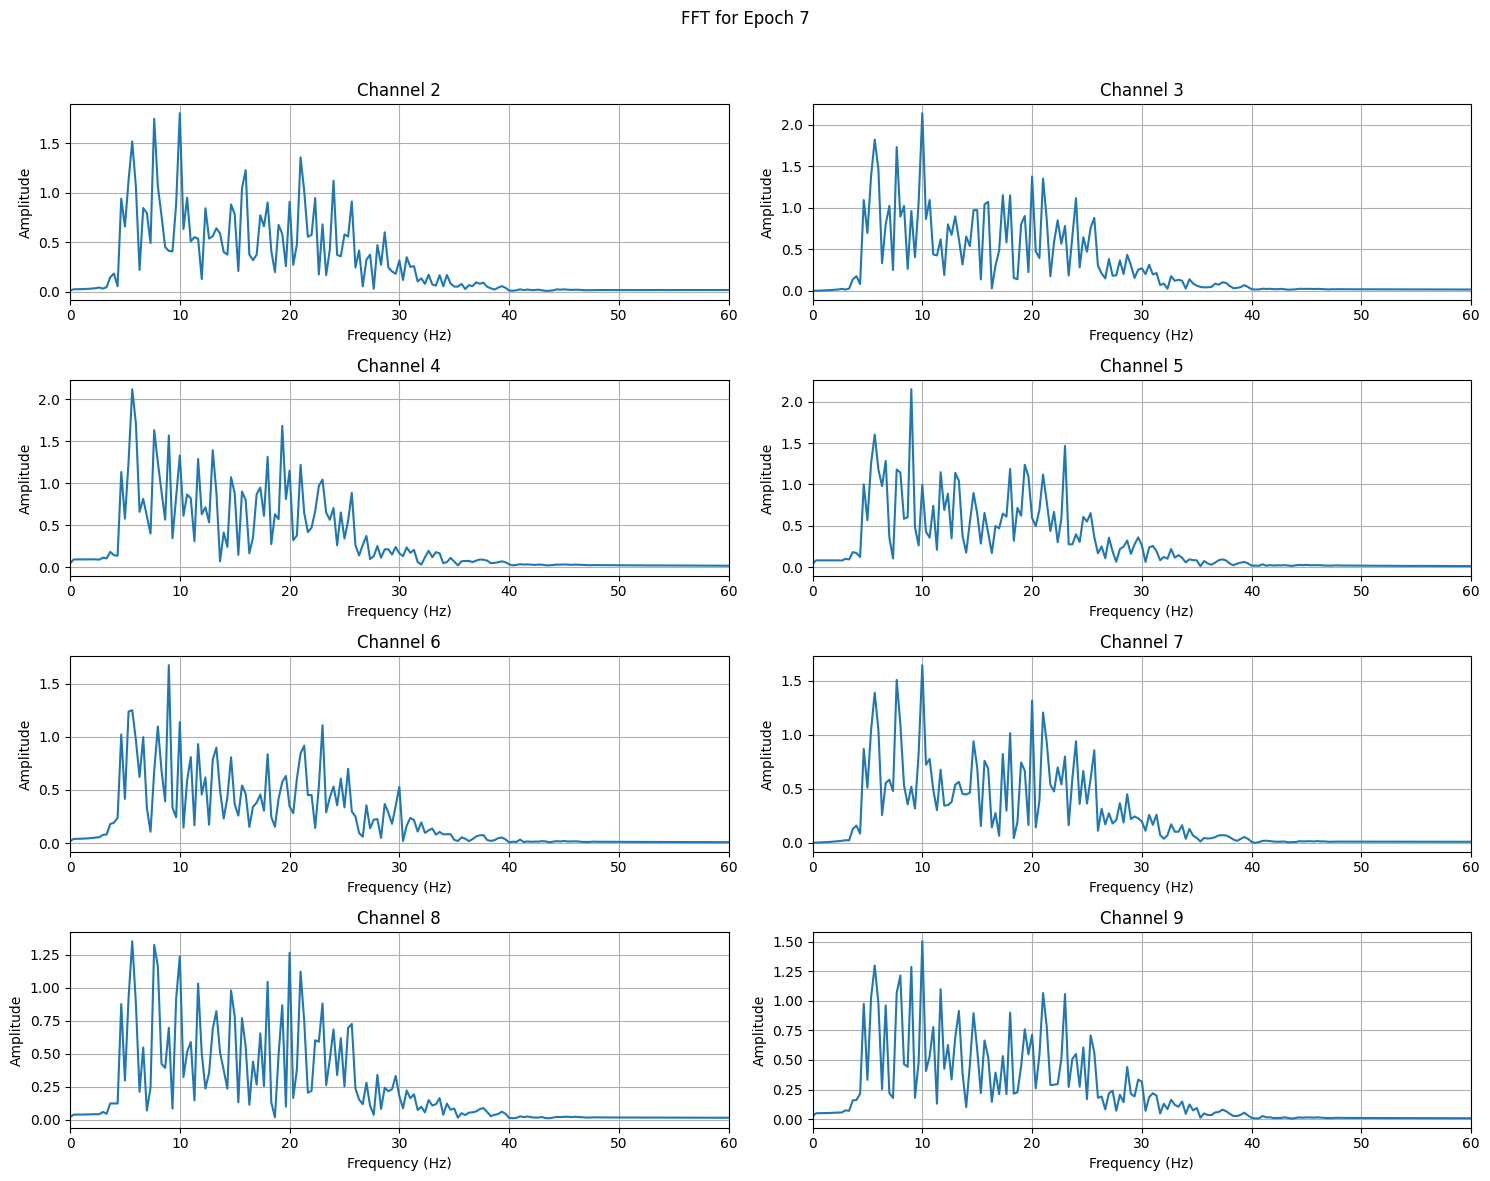

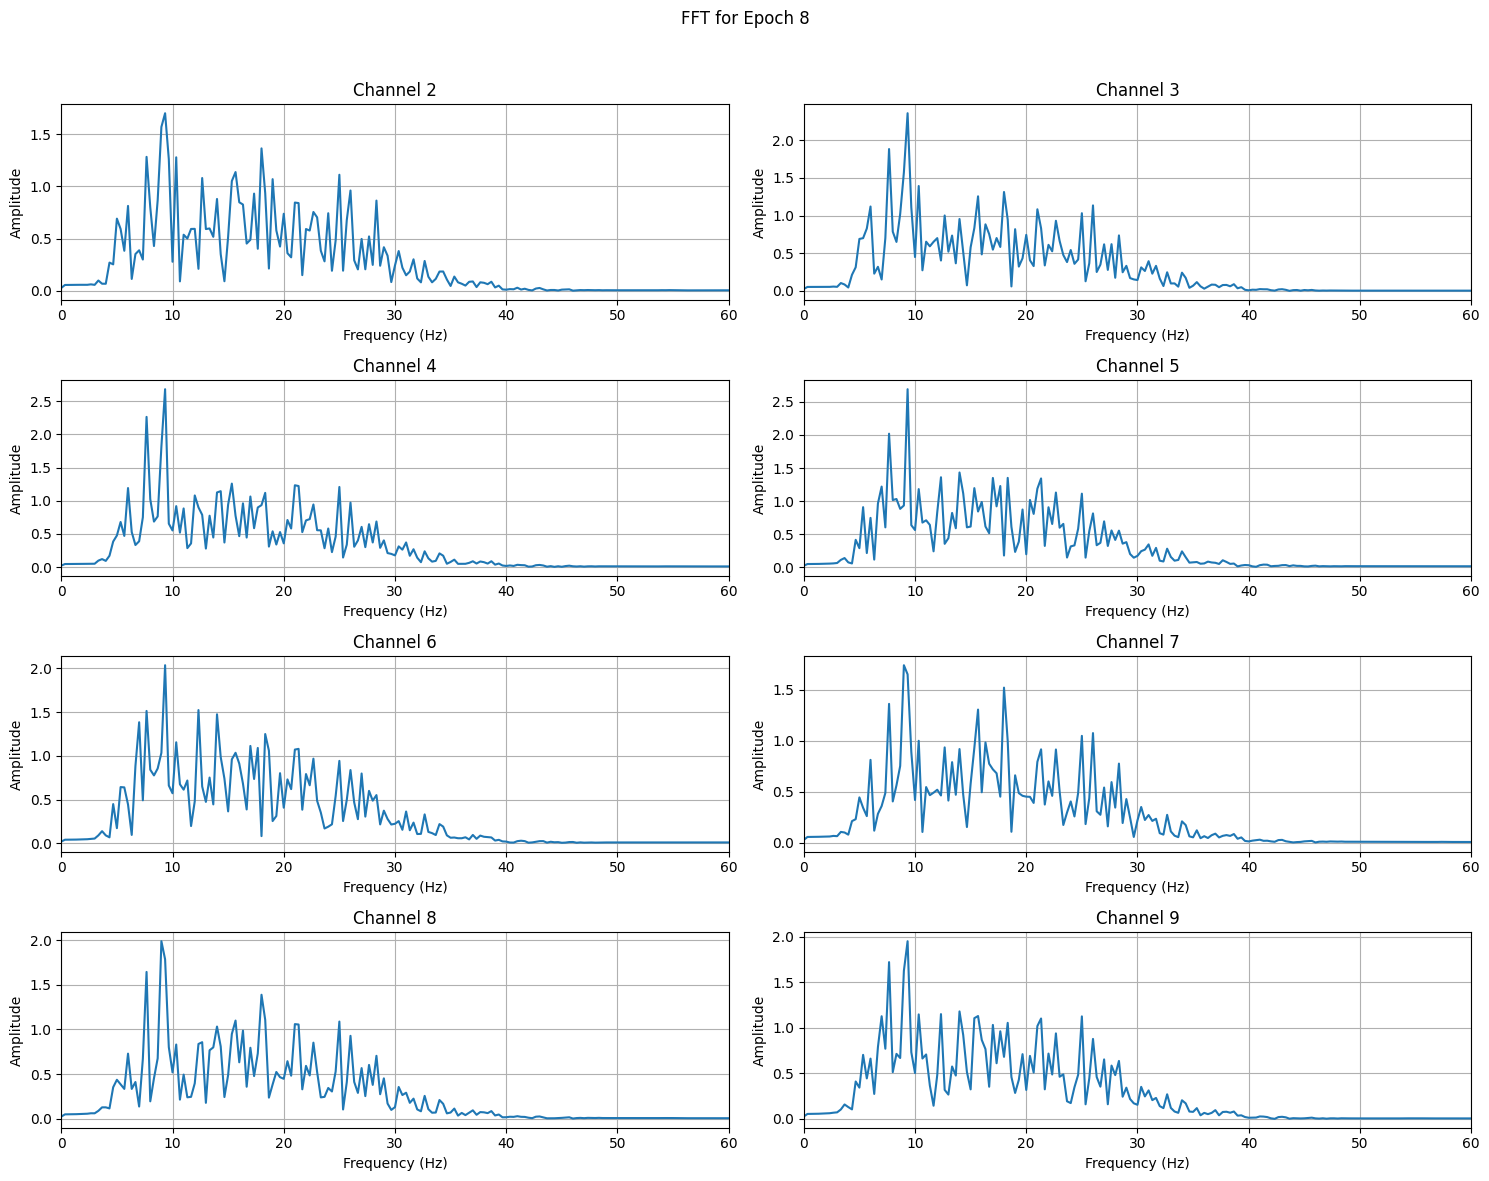

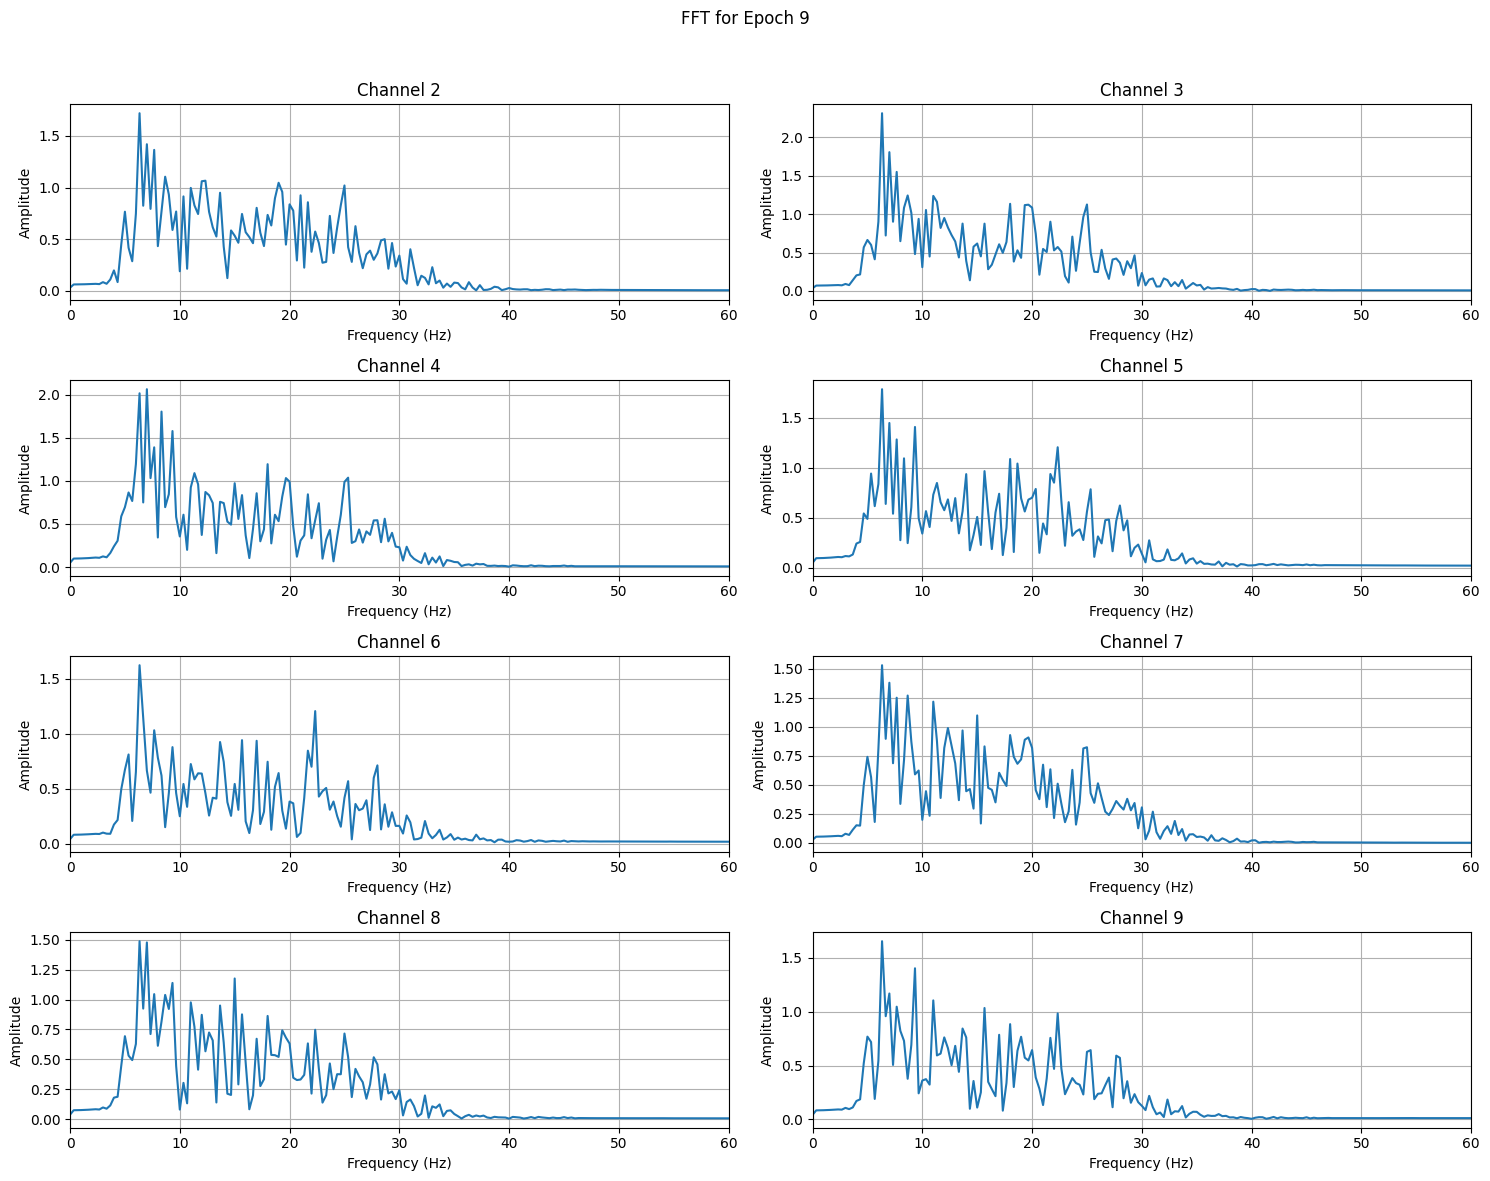

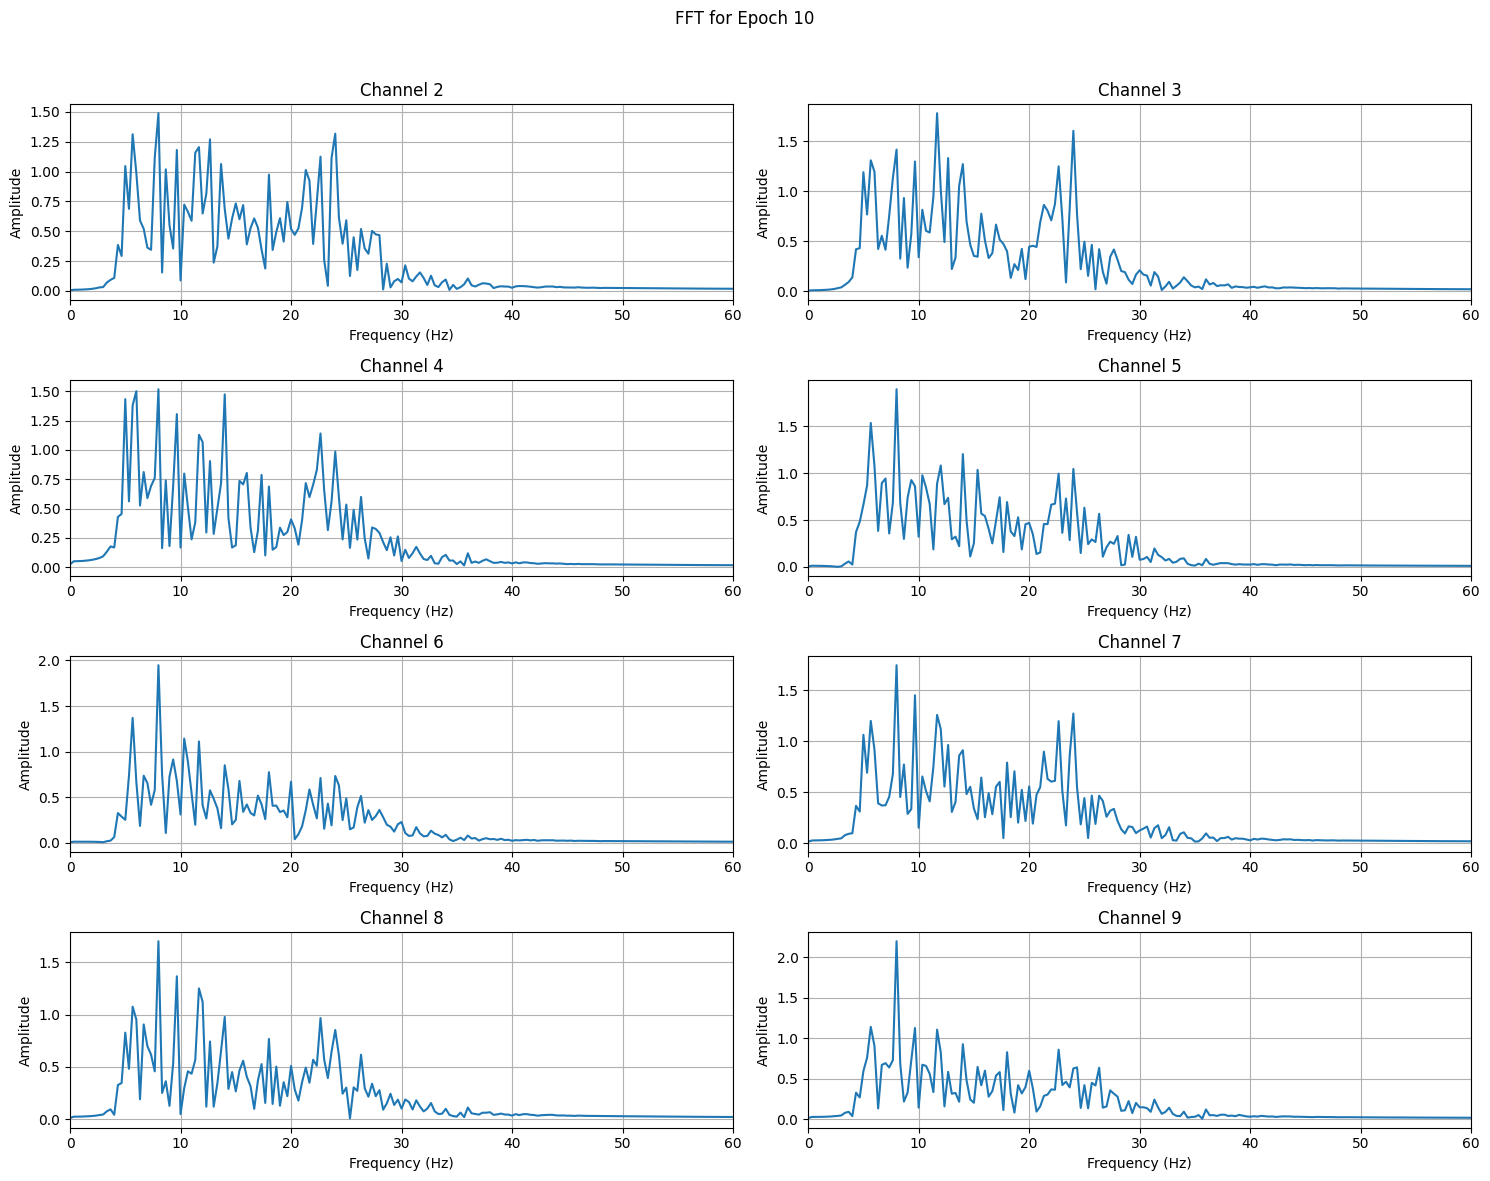

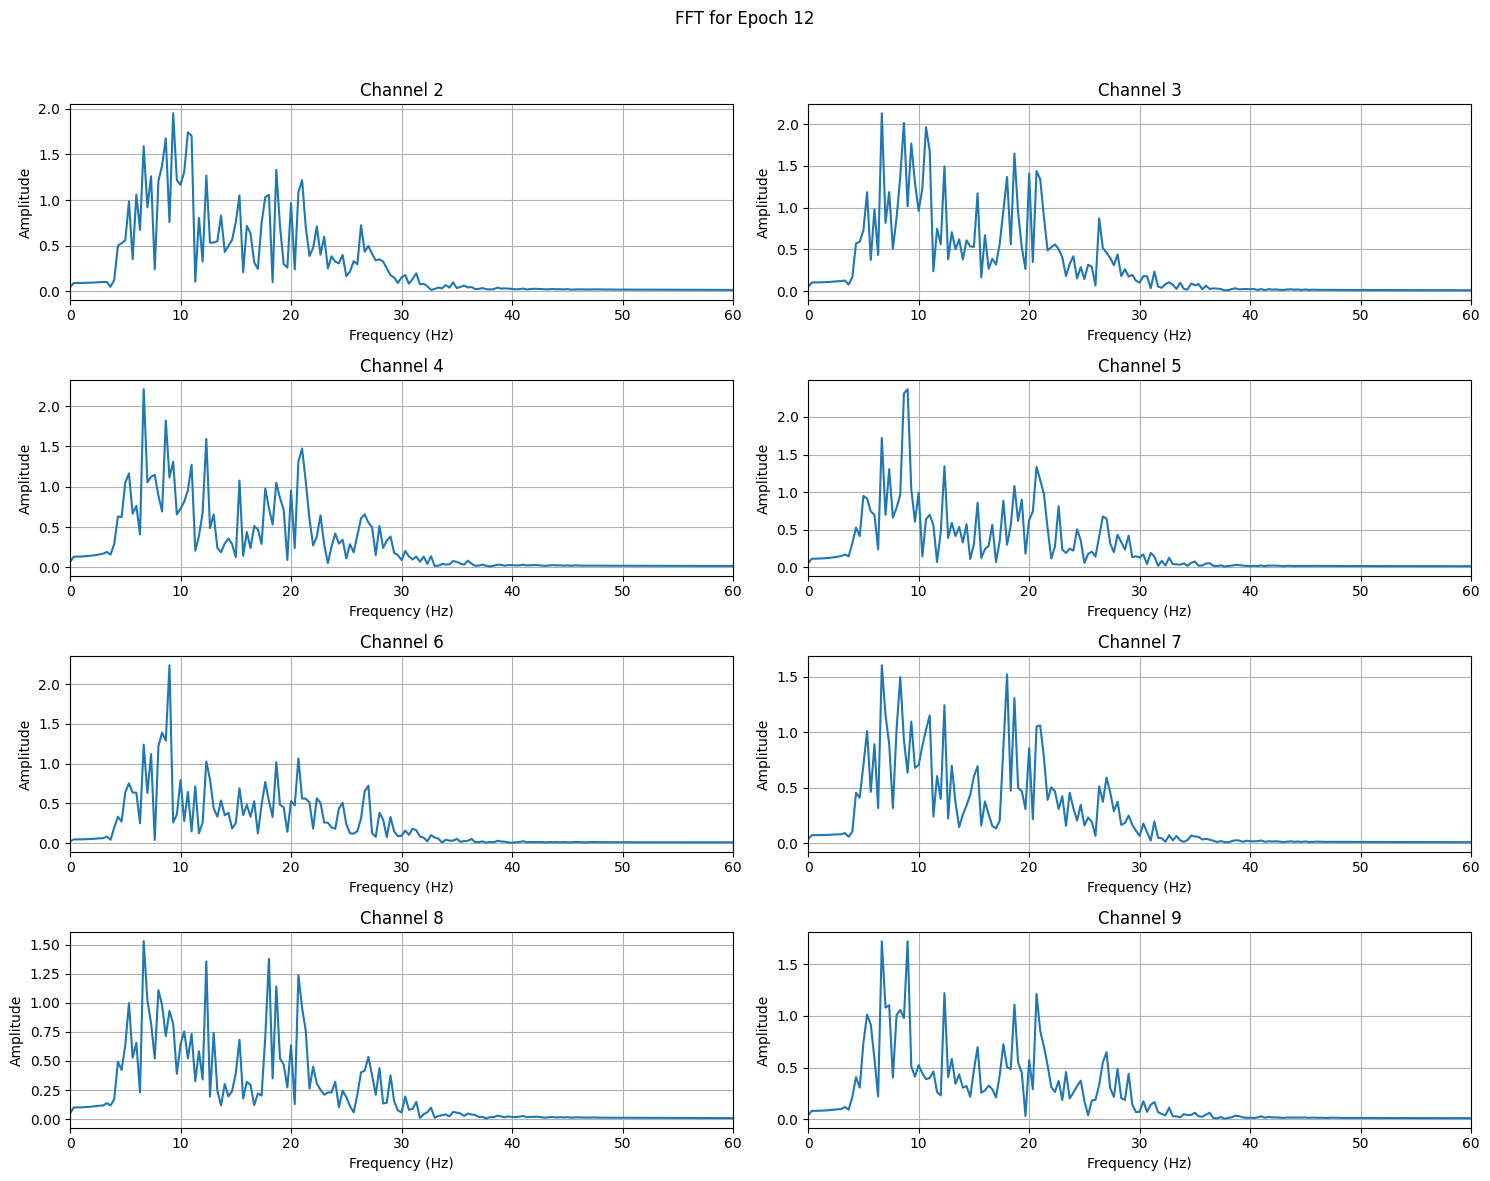

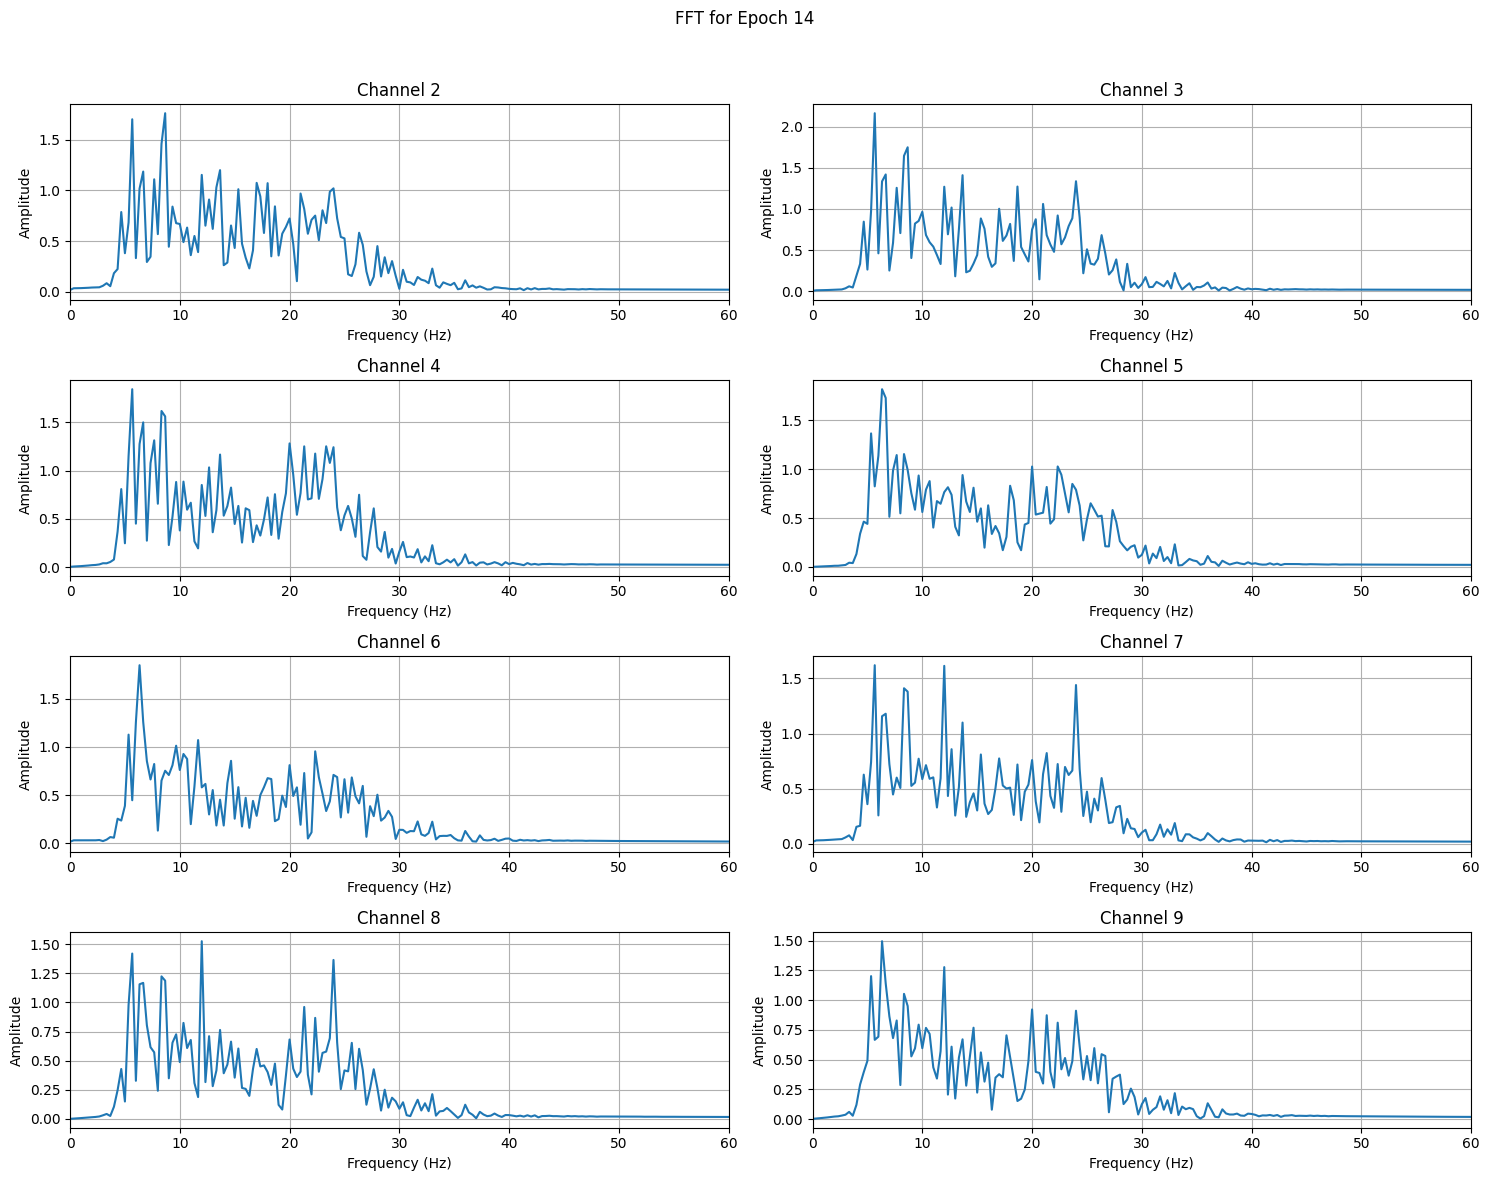

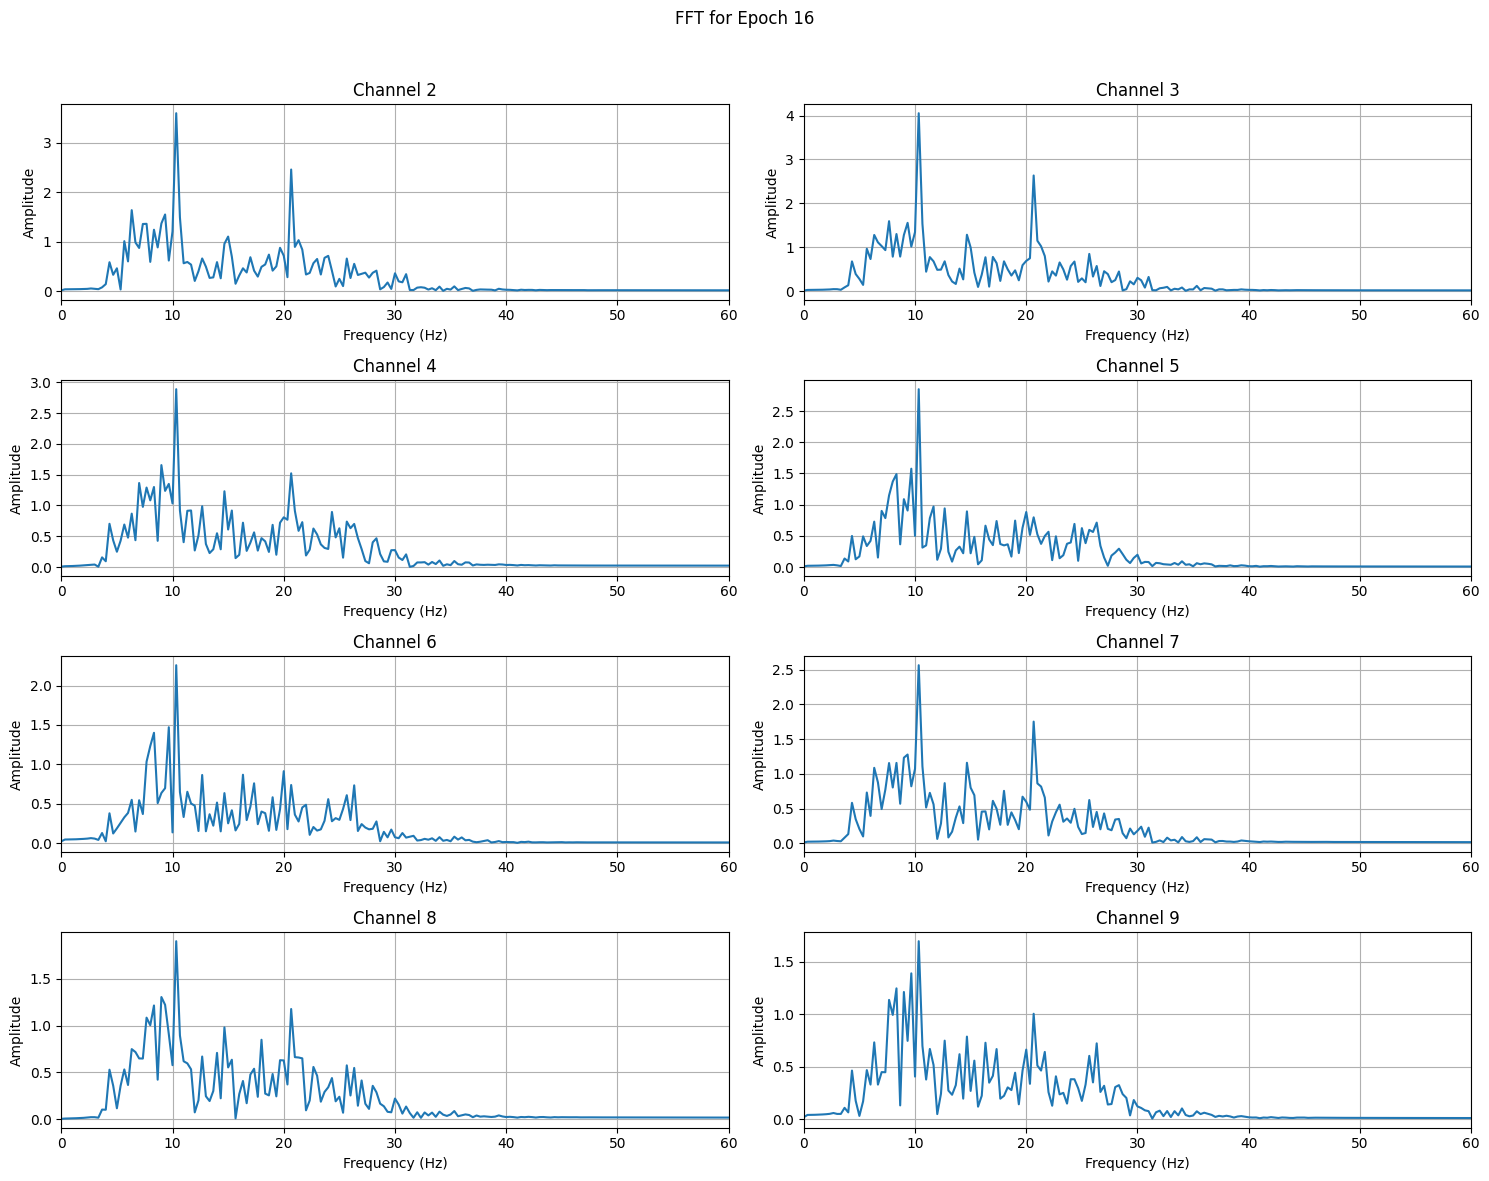

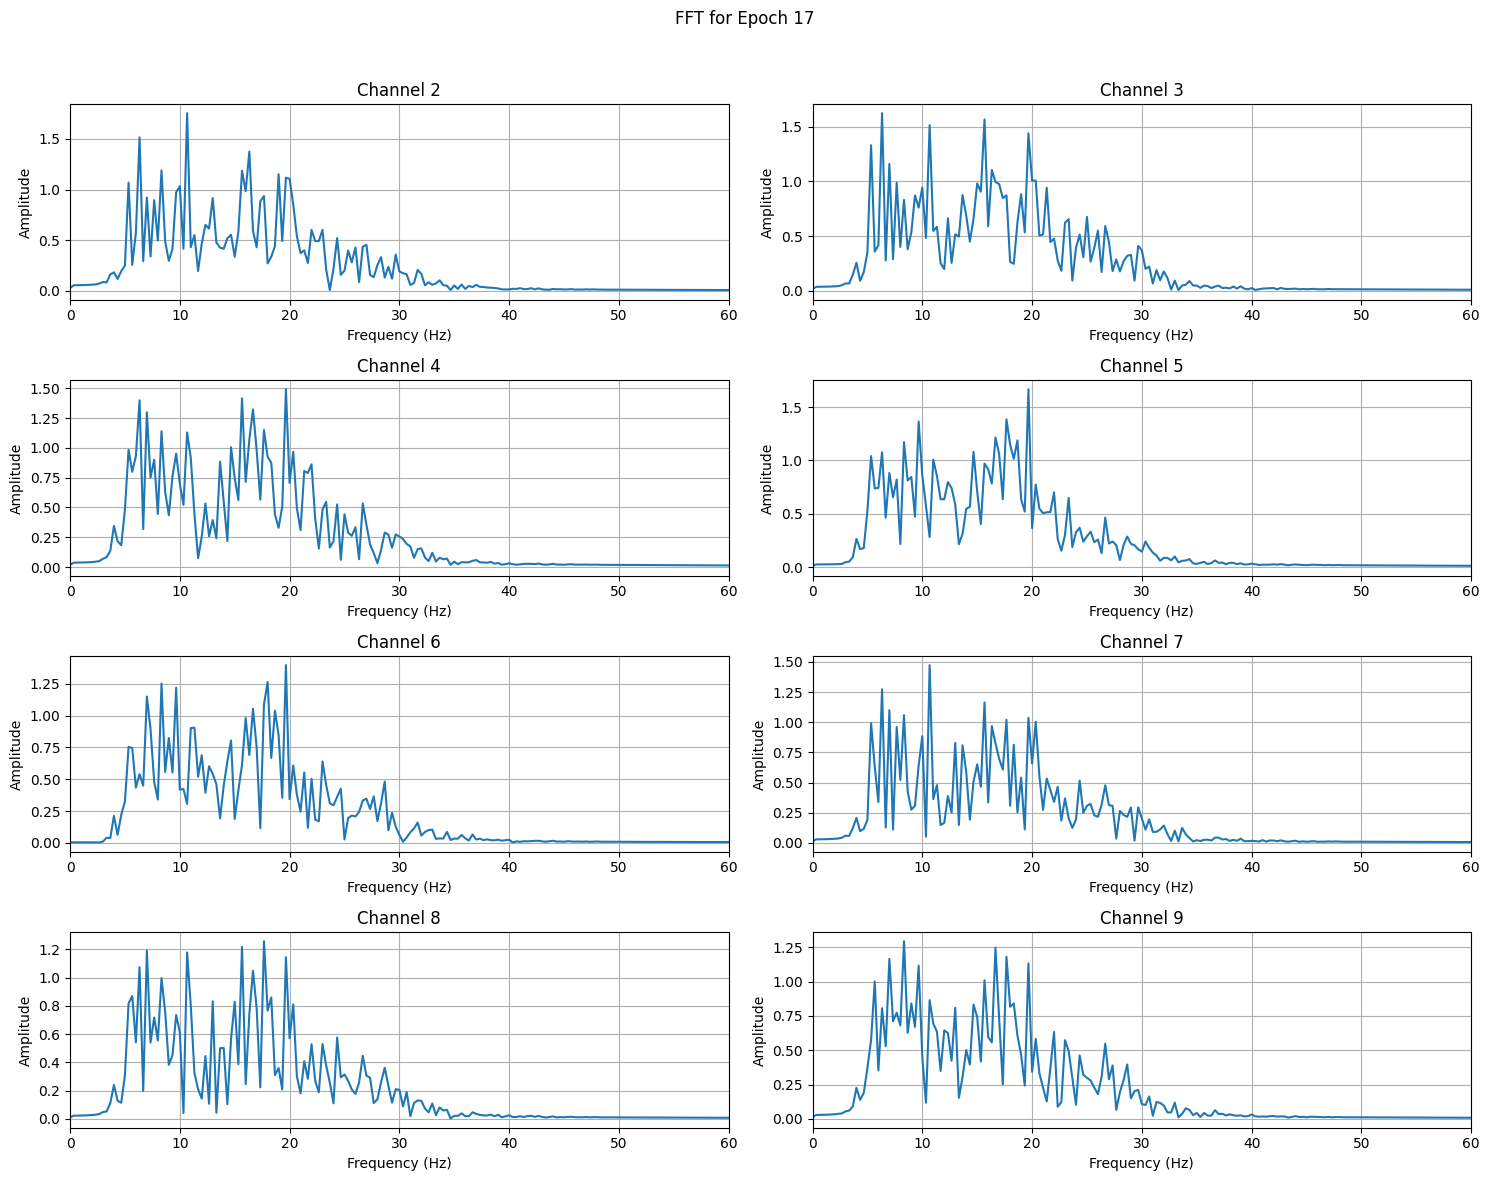

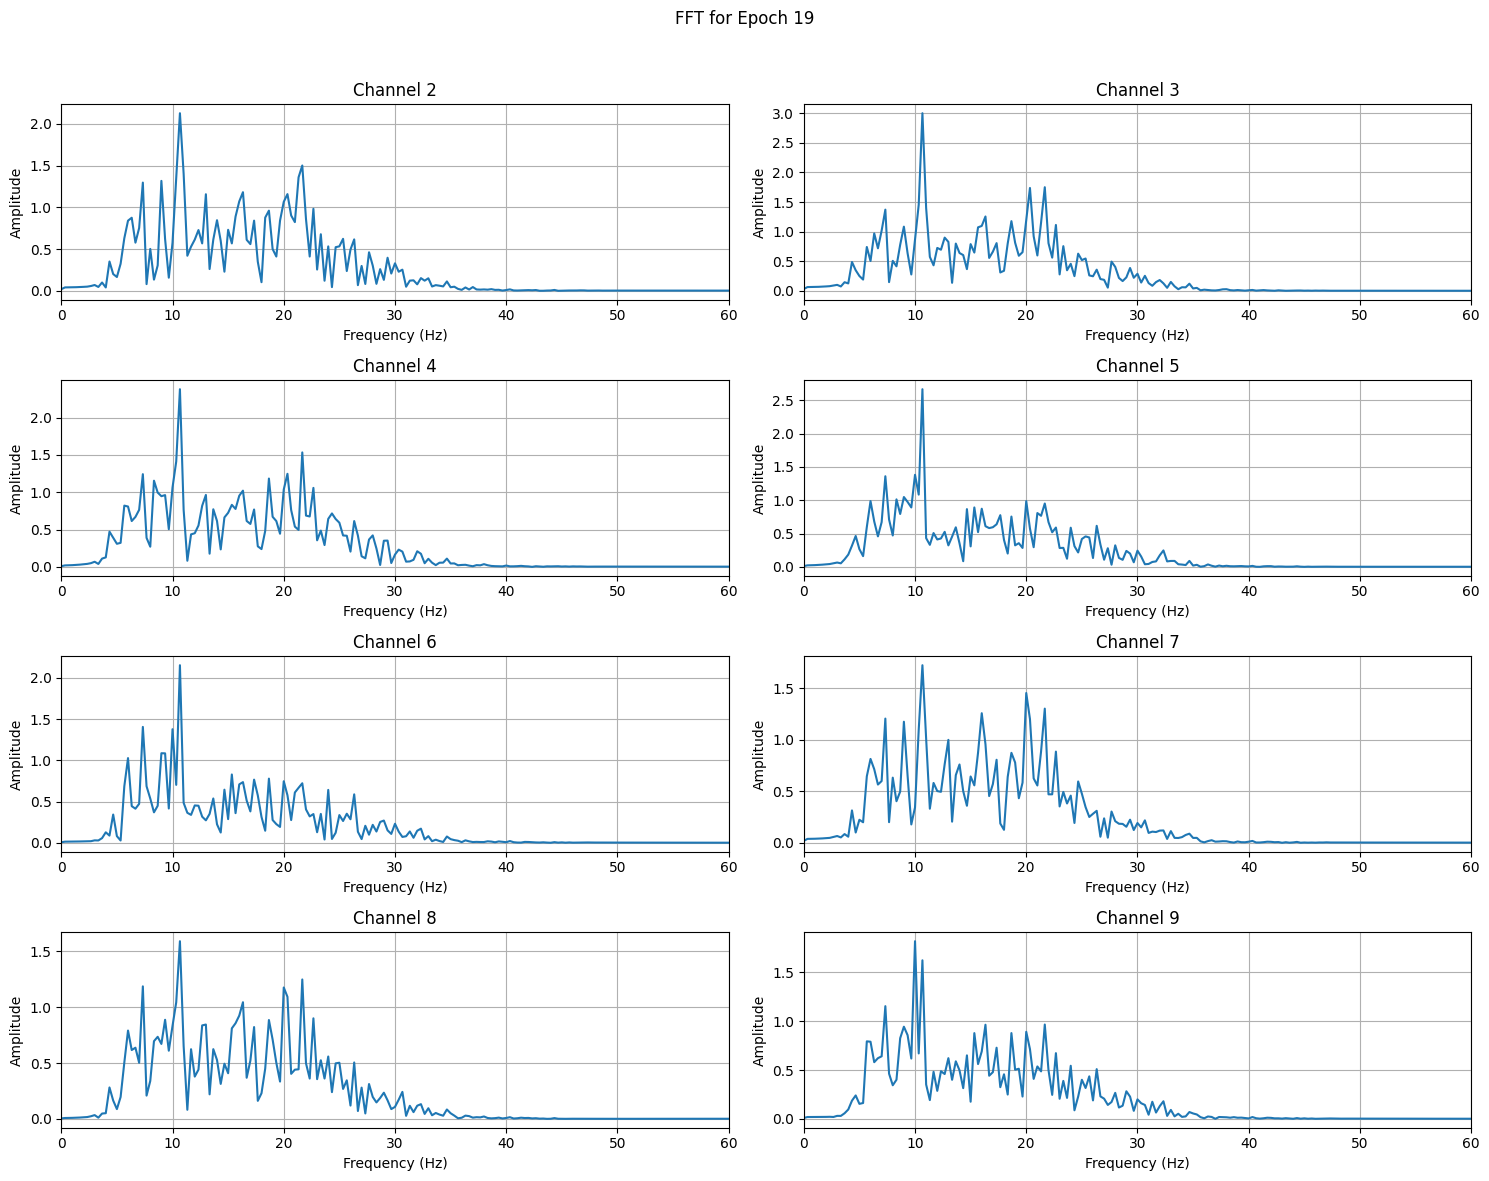

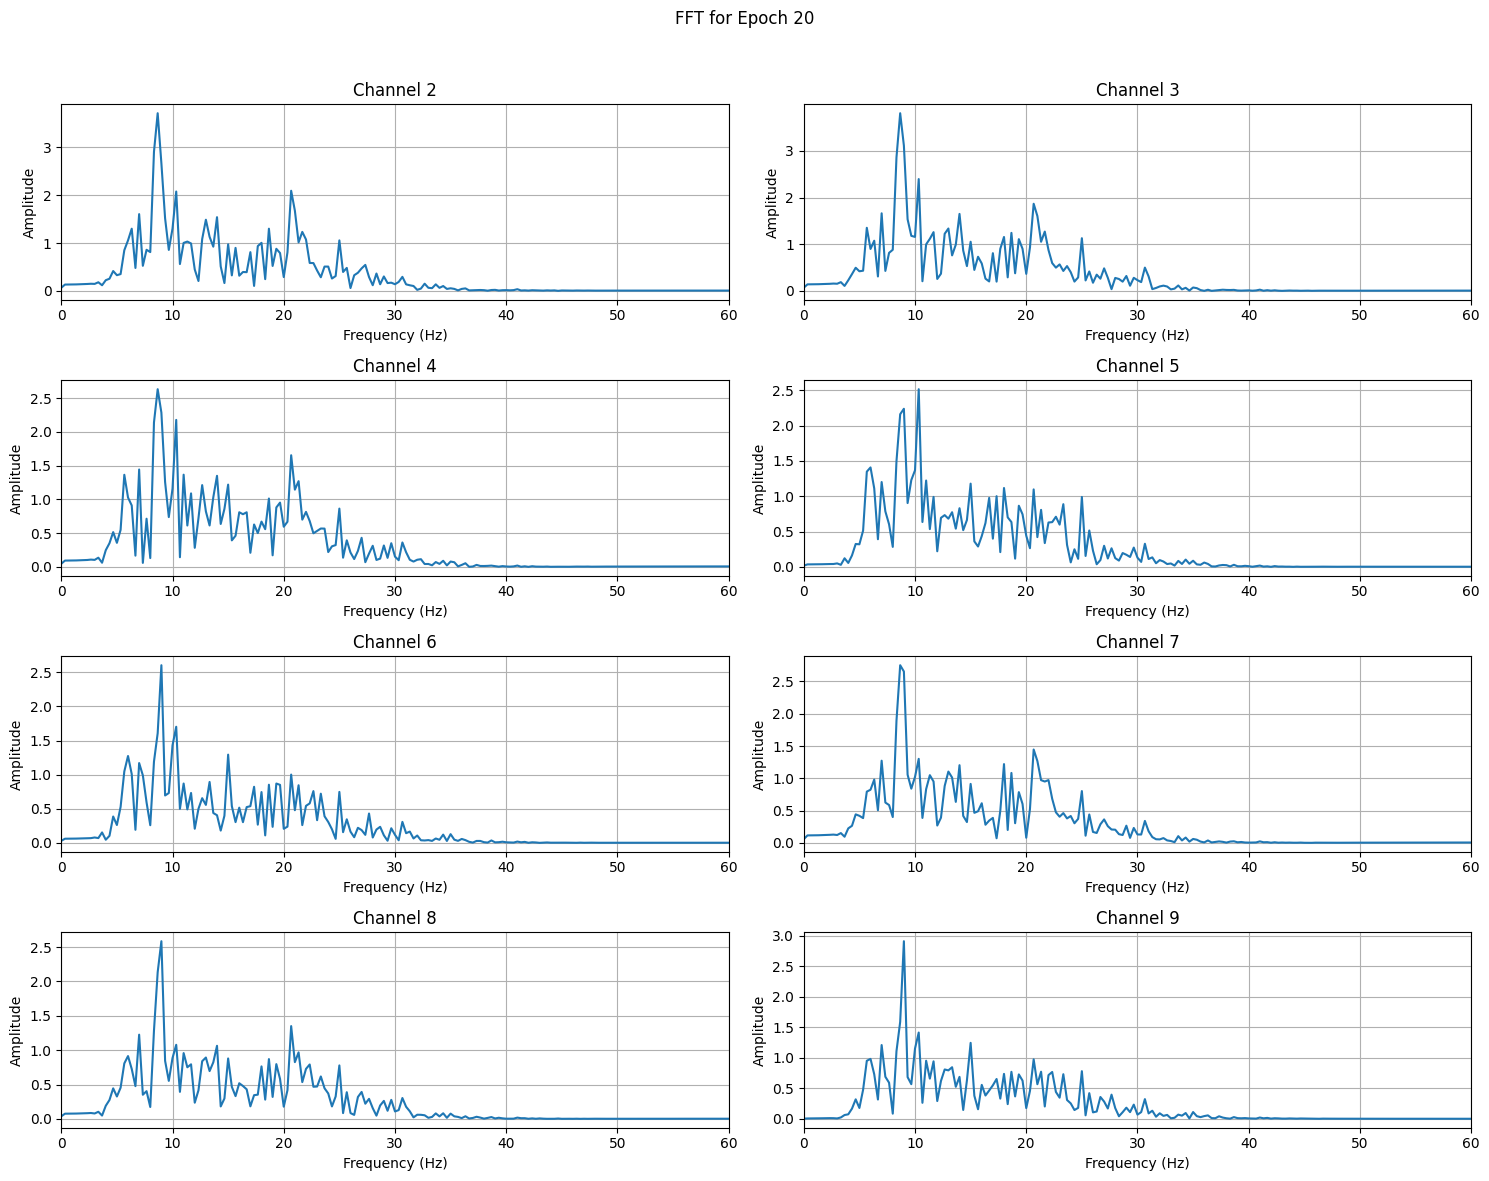

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy.io as sio

# Parameters for FFT
nfft = window_size  # FFT points should match the length of the window
frequencies = np.arange(nfft) * (fs / nfft)  # Frequency axis (in Hz)
max_plot_freq = 60  # Maximum frequency to plot (e.g., up to 60 Hz)

# Plot the FFT for each channel in each epoch
for i in range(len(epochs)):
   epoch = epochs[i]
   fig, axs = plt.subplots(4, 2, figsize=(15, 12))  # Create a 4x2 subplot grid
   fig.suptitle(f'FFT for Epoch {i+1}')  # Title for the plot
   
   axs = axs.flatten()  # Flatten the axs array for easier indexing
   
   for ch in range(epoch.shape[0]):  # Loop over all EEG channels
       # Compute FFT
       epoch_fft = np.fft.fft(epoch[ch, :], nfft)
       P2 = np.abs(epoch_fft / nfft)  # Two-sided spectrum
       P1 = P2[:nfft//2+1]  # One-sided spectrum
       P1[1:-1] = 2 * P1[1:-1]  # Double the energy for the positive half
       
       # Plot
       axs[ch].plot(frequencies[:nfft//2+1], P1)
       axs[ch].set_title(f'Channel {ch+2}')  # Channel numbers 2-9
       axs[ch].set_xlabel('Frequency (Hz)')
       axs[ch].set_ylabel('Amplitude')
       axs[ch].set_xlim([0, max_plot_freq])  # Limit the x-axis to the maximum plot frequency
       axs[ch].grid(True)
   
   plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the title
   plt.show()

## LDA Alignment using Trigger Info

In [23]:
import numpy as np
from scipy import stats

# Extract LDA output for each epoch based on trigger transitions
predicted_labels_lda = np.zeros(num_epochs)  # Initialize the predicted LDA labels

for i in range(num_epochs):
   epoch_start = onsets[i]  # Get the start of the epoch based on trigger_info
   epoch_end = min(epoch_start + window_size - 1, len(lda_output))  # Ensure we don't exceed the LDA output length
   
   # Extract the LDA output for the duration of the epoch
   epoch_lda_output = lda_output[epoch_start:epoch_end]
   
   # Use non-zero values of LDA output to find relevant predictions
   non_zero_lda_output = epoch_lda_output[epoch_lda_output != 0]
   
   # If there are non-zero values, take the most frequent (mode) or the last value
   if len(non_zero_lda_output) > 0:
       # Use mode for stable predictions
       # scipy.stats.mode returns ModeResult with mode and count attributes
       mode_result = stats.mode(non_zero_lda_output)
       predicted_labels_lda[i] = mode_result.mode  # Extract the mode value
   else:
       predicted_labels_lda[i] = 0  # Fallback to 0 if no non-zero LDA values are found

# Print some statistics about the predicted labels
print(f"Number of predictions: {len(predicted_labels_lda)}")
print(f"Unique predicted labels: {np.unique(predicted_labels_lda)}")
print(f"Prediction counts: {np.bincount(predicted_labels_lda.astype(int))}")

Number of predictions: 20
Unique predicted labels: [0. 3.]
Prediction counts: [17  0  0  3]


## CCA, FBCCA, and LDA Analysis

In [24]:
# Cell 1: Import necessary libraries
import numpy as np
from scipy import signal
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
import warnings

In [25]:
# Cell 2: Helper functions
def create_reference_signals(frequency, harmonics, num_samples, fs):
    """
    Create reference signals for CCA analysis
    
    Parameters:
    frequency: target frequency in Hz
    harmonics: number of harmonics to include
    num_samples: number of time points
    fs: sampling frequency (in Hz)
    
    Returns:
    ref_signals: array of sine and cosine signals for each harmonic
    """
    t = np.arange(num_samples) / fs  # Time vector
    ref_signals = np.zeros((2 * harmonics, num_samples))
    
    # Create sine and cosine signals for each harmonic
    for h in range(1, harmonics + 1):
        ref_signals[2 * (h - 1), :] = np.sin(2 * np.pi * h * frequency * t)
        ref_signals[2 * h - 1, :] = np.cos(2 * np.pi * h * frequency * t)
    
    return ref_signals

def compute_cca_correlation(X, Y):
    """Compute maximum canonical correlation between X and Y"""
    cca = CCA(n_components=1)
    cca.fit(X, Y)
    X_c, Y_c = cca.transform(X, Y)
    corr = np.corrcoef(X_c.T, Y_c.T)[0, 1]
    return abs(corr)

def process_epoch(epoch, frequencies_of_interest, frequencies_of_interest_reversed, 
                 harmonics, fs, ground_truth_frequencies, lda_ground_truth, predicted_labels_lda, i):
    """Process a single EEG epoch with CCA and FBCCA"""
    
    # Ensure we do not have low variance
    if np.var(epoch) < 1e-10:
        warnings.warn(f"Epoch {i} has low variance!")
        return 0, 0, 0, 0, 0
    
    # Apply PCA
    pca = PCA()
    score = pca.fit_transform(epoch.T)
    reduced_epoch = score[:, :min(score.shape[1], 4)]
    
    # --- CCA Analysis ---
    max_corr = np.zeros(len(frequencies_of_interest))
    for f_idx in range(len(frequencies_of_interest)):
        ref_signals = create_reference_signals(
            frequencies_of_interest_reversed[f_idx], 
            harmonics, 
            reduced_epoch.shape[0], 
            fs
        )
        max_corr[f_idx] = compute_cca_correlation(reduced_epoch, ref_signals.T)
    
    predicted_freq_idx_cca = np.argmax(max_corr)
    predicted_label_cca = frequencies_of_interest[predicted_freq_idx_cca]
    
    # Check prediction
    acc_cca = int(predicted_label_cca == ground_truth_frequencies[i])
    
    # --- FBCCA Analysis ---
    fb_corr = np.zeros(len(frequencies_of_interest))
    num_bands = 7
    
    for band_idx in range(1, num_bands + 1):
        f_lower = np.maximum(0, frequencies_of_interest - 2 * band_idx)  # Clamp to 0
        f_upper = np.minimum(fs/2, frequencies_of_interest + 2 * band_idx)  # Clamp to Nyquist
        
        for f_idx in range(len(frequencies_of_interest)):
            # Ensure valid frequency range for bandpass filter
            if f_lower[f_idx] >= f_upper[f_idx]:
                warnings.warn(f'Skipping band {band_idx} due to invalid frequency range.')
                continue
            
            # Normalize frequencies to be between 0 and 1
            norm_f_lower = f_lower[f_idx] / (fs/2)
            norm_f_upper = f_upper[f_idx] / (fs/2)
            
            # Ensure that the normalized frequencies are within the valid range (0,1)
            if norm_f_lower <= 0 or norm_f_upper >= 1 or norm_f_lower >= norm_f_upper:
                warnings.warn('Skipping due to invalid normalized frequency range.')
                continue
            
            # Apply Butterworth filter with validated frequency range
            b_fb, a_fb = signal.butter(1, [norm_f_lower, norm_f_upper], btype='bandpass')
            epoch_fb = signal.filtfilt(b_fb, a_fb, epoch)
            
            # CCA analysis on filtered epoch
            ref_signals = create_reference_signals(
                frequencies_of_interest_reversed[f_idx], 
                harmonics, 
                epoch_fb.shape[1], 
                fs
            )
            r_fb = compute_cca_correlation(epoch_fb.T, ref_signals.T)
            fb_corr[f_idx] += r_fb
    
    predicted_freq_idx_fbcca = np.argmax(fb_corr)
    predicted_label_fbcca = frequencies_of_interest[predicted_freq_idx_fbcca]
    
    # Check prediction
    acc_fbcca = int(predicted_label_fbcca == ground_truth_frequencies[i])
    
    # --- LDA Analysis ---
    acc_lda = int(predicted_labels_lda[i] == lda_ground_truth[i])
    
    # Progress
    if i % 10 == 0:
        print(f'Epoch {i} of {len(ground_truth_frequencies)} processed.')
    
    return acc_cca, acc_fbcca, acc_lda, predicted_label_cca, predicted_label_fbcca

In [26]:
# Cell 3: Initialize variables and parameters
# These are placeholders - you'll need to define these values based on your data
num_epochs = 100  # Example value
epochs = [None] * num_epochs  # Replace with your actual epochs data
frequencies_of_interest = np.array([8.0, 9.0, 10.0, 11.0, 12.0])  # Example frequencies
frequencies_of_interest_reversed = frequencies_of_interest[::-1]  # Reversed frequencies
harmonics = 3  # Number of harmonics to use
fs = 250  # Sampling frequency in Hz
ground_truth_frequencies = np.zeros(num_epochs)  # Replace with your ground truth
lda_ground_truth = np.zeros(num_epochs)  # Replace with your LDA ground truth
predicted_labels_lda = np.zeros(num_epochs)  # Replace with your LDA predictions

In [28]:
# Cell 4: Run parallel processing
# Filter out None values from the epochs list
valid_epochs = [(epoch, i) for i, epoch in enumerate(epochs) if epoch is not None]

results = Parallel(n_jobs=-1)(
    delayed(process_epoch)(
        epoch, 
        frequencies_of_interest, 
        frequencies_of_interest_reversed,
        harmonics, 
        fs, 
        ground_truth_frequencies, 
        lda_ground_truth, 
        predicted_labels_lda,
        i
    ) for epoch, i in valid_epochs
)

In [29]:
# Cell 5: Extract results from parallel processing
acc_cca = np.zeros(num_epochs)
acc_fbcca = np.zeros(num_epochs)
acc_lda = np.zeros(num_epochs)
predicted_labels_cca = np.zeros(num_epochs)
predicted_labels_fbcca = np.zeros(num_epochs)

for i, (acc_c, acc_fb, acc_l, pred_cca, pred_fbcca) in enumerate(results):
    acc_cca[i] = acc_c
    acc_fbcca[i] = acc_fb
    acc_lda[i] = acc_l
    predicted_labels_cca[i] = pred_cca
    predicted_labels_fbcca[i] = pred_fbcca

In [30]:
# Cell 6: Calculate and display results
average_acc_cca = np.mean(acc_cca)
average_acc_fbcca = np.mean(acc_fbcca)
average_acc_lda = np.mean(acc_lda)

print(f"Average CCA accuracy: {average_acc_cca:.4f}")
print(f"Average FBCCA accuracy: {average_acc_fbcca:.4f}")
print(f"Average LDA accuracy: {average_acc_lda:.4f}")

Average CCA accuracy: 0.0000
Average FBCCA accuracy: 0.0000
Average LDA accuracy: 0.0000


In [31]:
# Cell 7: Visualize results
plt.figure(figsize=(10, 6))
plt.bar(['CCA', 'FBCCA', 'LDA'], [average_acc_cca, average_acc_fbcca, average_acc_lda])
plt.title('Classification Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

CCA Accuracy: 0.00%
FBCCA Accuracy: 0.00%
LDA Accuracy: 0.00%


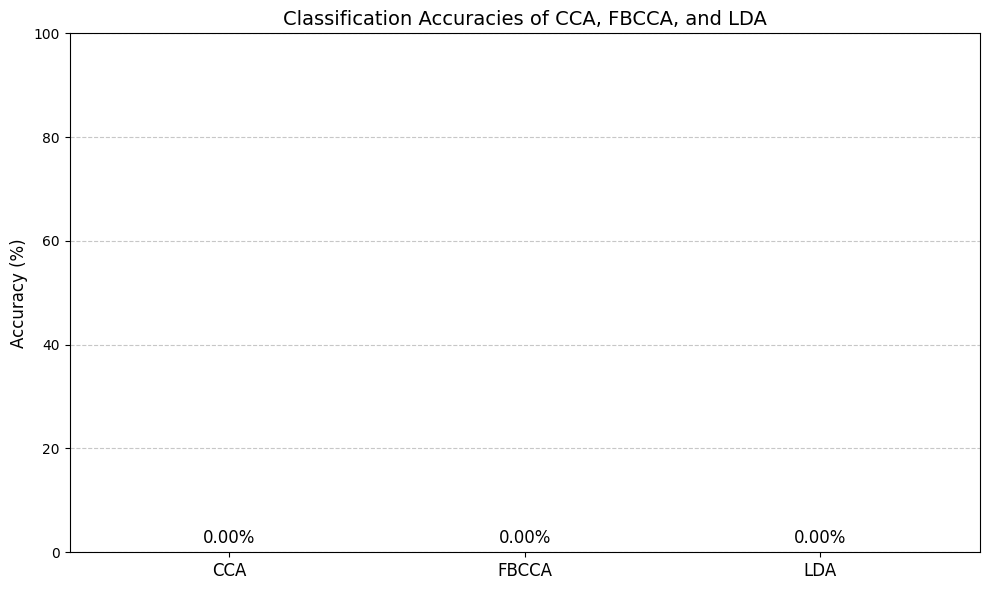

In [32]:
# Cell: Calculate average accuracies and visualize results
import matplotlib.pyplot as plt
import numpy as np

# Calculate average accuracies (converting to percentage)
avg_cca_accuracy = np.mean(acc_cca) * 100
avg_fbcca_accuracy = np.mean(acc_fbcca) * 100
avg_lda_accuracy = np.mean(acc_lda) * 100

# Display the accuracies for each model
print(f"CCA Accuracy: {avg_cca_accuracy:.2f}%")
print(f"FBCCA Accuracy: {avg_fbcca_accuracy:.2f}%")
print(f"LDA Accuracy: {avg_lda_accuracy:.2f}%")

# Combine the accuracies into one array for plotting
accuracies = [avg_cca_accuracy, avg_fbcca_accuracy, avg_lda_accuracy]

# Plot the accuracies on the same bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(accuracies)), accuracies)

# Add value labels on top of each bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{accuracies[i]:.2f}%',
             ha='center', va='bottom', fontsize=12)

plt.title('Classification Accuracies of CCA, FBCCA, and LDA', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.xticks(range(len(accuracies)), ['CCA', 'FBCCA', 'LDA'], fontsize=12)
plt.ylim([0, 100])  # Set the Y-axis range to 0-100%
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()